<span style="font-size: 30px;">**Exploring Optimal Models for Recognizing Handwritten English Characters: A Data Science Approach**</span>

<span style="font-size: 22px;">**Introduction**</span>

$\qquad$In the modern day, recognizing and interpreting handwritten characters have played a crucial role in our life. Accurately recognizing characters leads to a wide range of application areas, including automatic recognizing english characters, which improved artificial intelligence (Dhande & Kharat, 2017). This research aims to develop optimal models for the recognition and interpretation of handwritten English characters in a given picture. To achieve this, we employ classification and linguistic regression in the $R$ programming language and utilize visualization to create various plots to present our research findings.

$\qquad$The major goal of our research is to create an effective approach for recognizing and interpreting handwritten English characters (upper case A-Z). The benefit of creating a reliable computer handwriting recognition for the $26$ letters of the alphabet can greatly reduce the need for manual transcribing, which leads to significant time savings and reduces labor costs in various industries that heavily rely on handwritten documents. Meanwhile, handwriting recognition can play a vital role in medical caring. For example, forming communication with aphasiac.

$\qquad$The Research of handwriting recognition in computers can prompt the advancement of artificial intelligence and technology. Techniques like deep learning, convolutional neural networks, or recurrent neural networks, which are commonly used for handwriting recognition, could benefit from the findings and methods presented in the project. This could lead to further innovation and advancement in the broader field of pattern recognition and computer vision.


<span style="font-size: 22px;">**Methods & Results**</span>

#### 1. Import the packages using `library()`

In [1]:
# Loading the libraries
library(tidyverse)
library(tidymodels)
library(cowplot)
library(repr)

options(repr.matrix.max.rows = 10)

show_digit = function(arr784, col = gray(12:1 / 12), ...) {
  arr784$X <- 0
  image(matrix(as.matrix(arr784[-785]), nrow = 28)[, 28:1], col = col, ...)
}

── Attaching packages ────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ───────────────────────────────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ──────────────────────────────────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖

#### 2. loads data from the original source on the web 

- raw data source: https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
- read the csv file from the remote repository using `read_csv`
- check the columns' data types and labels

In [2]:
url <- "https://raw.githubusercontent.com/AllenCheng5186/DSCI100-Proj-Group50-23s1/main/data2/chr_data_set_26000.csv"

chr_data_set <- read_csv(url)
chr_data_set

Rows: 26000 Columns: 785
── Column specification ───────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (785): label, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


label,1,2,3,4,5,6,7,8,9,⋯,775,776,777,778,779,780,781,782,783,784
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
25,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


<div align="center">Figure 2.1 :Raw data table.

#### 3. wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis

Since the data type for the label column is `dbl`, which means $26$ letters are labeled as $(0 \sim 25)$, in order to convert it into tidy data:
- use `mutate` function convert the data type from `dbl` to `fac`
- change the level of factor into readable alphabet, a to z
- check the data frame whether it is tidy data form

In [3]:
# define a alphabet that contains English letter from a to z
alphabet <- c("a", "b", "c", "d", "e", "f", "g", "h", "i", 
                                 "j", "k", "l", "m", "n", "o", "p", "q", "r", 
                                 "s", "t", "u", "v", "w", "x", "y", "z")

chr_tidy_data <- chr_data_set |>
    mutate(label = as.factor(label)) # factor the column of label

levels(chr_tidy_data$label) <- alphabet # change the levels of factor to readable alphabet

chr_tidy_data

label,1,2,3,4,5,6,7,8,9,⋯,775,776,777,778,779,780,781,782,783,784
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
z,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
z,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
z,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


<div align="center">Figure 3.1:Tidy data table.

##### 3.2 Goal and  purpose

In the project, our goal is not only building a KNN classifier, but also exploring the further improvement for increasing the model accuracy. For explore the relationship between the data size and accuracy, extract three different sizes of data sets to train three different models. Furthermore, use logistic regression to filter each test data sets based on the probabilities for each new observations, which we can consider them as outliers in the data size. To test whether filtering these outliers out can increase models' accuracies.

In [4]:
# extract half amount of observations to training different KNN models
chr_data_set_13000 <- chr_tidy_data |>
    group_by(label) |>
    do(head(., n = 500))

nrow(chr_data_set_13000)
chr_data_set_13000
write_csv(chr_data_set_13000, "data2/chr_data_set_13000.csv")

[1] 13000

label,1,2,3,4,5,6,7,8,9,⋯,775,776,777,778,779,780,781,782,783,784
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
z,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
z,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
z,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


<div align="center">Figure 3.2: 13000 observations data set.

In [5]:
# extract 1/10 amount of observations to tune K value for KNN
chr_data_set_2600 <- chr_tidy_data |>
    group_by(label) |>
    do(head(., n = 100))

nrow(chr_data_set_2600)
chr_data_set_2600

[1] 2600

label,1,2,3,4,5,6,7,8,9,⋯,775,776,777,778,779,780,781,782,783,784
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
z,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
z,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
z,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


<div align="center">Figure 3.2: 2600 observations data set.

#### 4. performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 

Use `group by` and `summarize` to count the number of observations in each category in all three data sets

In [6]:
# count the number of observations for each letter
each_letter_count_26000 <- chr_tidy_data |>
    group_by(label) |>
    summarize(count = n()) |>
    pivot_wider(names_from = label, values_from = count)

each_letter_count_26000

a,b,c,d,e,f,g,h,i,j,⋯,q,r,s,t,u,v,w,x,y,z
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,⋯,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


<div align="center">Figure 4.1: Alphabetical letter distribution of 26000 observations data set.

Since we already have the tidy data frame, use `all` function to check whether each category's volumn of observations are equal (distributed evenly).

In [7]:
all(each_letter_count_26000  == 1000)

[1] TRUE

In [8]:
each_letter_count_13000 <- chr_data_set_13000 |>
    group_by(label) |>
    summarize(count = n()) |>
    pivot_wider(names_from = label, values_from = count)

each_letter_count_13000

a,b,c,d,e,f,g,h,i,j,⋯,q,r,s,t,u,v,w,x,y,z
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
500,500,500,500,500,500,500,500,500,500,⋯,500,500,500,500,500,500,500,500,500,500


<div align="center">Figure 4.2: Alphabetical letter distribution of 13000 observations data set.

In [9]:
all(each_letter_count_13000  == 500)

[1] TRUE

In [10]:
each_letter_count_2600 <- chr_data_set_2600 |>
    group_by(label) |>
    summarize(count = n()) |>
    pivot_wider(names_from = label, values_from = count)

each_letter_count_2600

a,b,c,d,e,f,g,h,i,j,⋯,q,r,s,t,u,v,w,x,y,z
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
100,100,100,100,100,100,100,100,100,100,⋯,100,100,100,100,100,100,100,100,100,100


<div align="center">Figure 4.3: Alphabetical letter distribution of 2600 observations data set.

In [11]:
all(each_letter_count_2600  == 100)

[1] TRUE

#### 5. creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis

Before start data analysis, preview the image of letter rendered from metric

# A tibble: 1 × 1
  label
  <fct>
1 a    


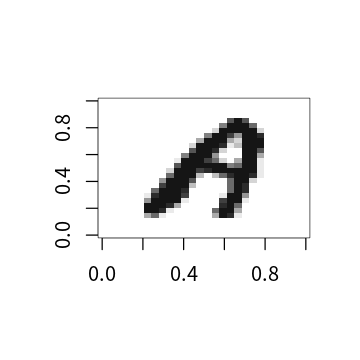

# A tibble: 1 × 1
  label
  <fct>
1 a    


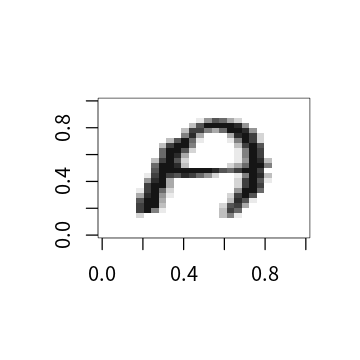

# A tibble: 1 × 1
  label
  <fct>
1 a    


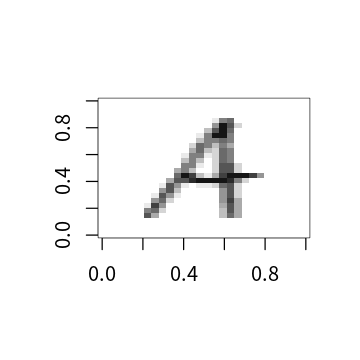

In [12]:
# get the images for the first 3 row from the data set.
options(repr.plot.width = 3, repr.plot.height = 3)

for (i in 1:3){
    show_digit(slice(select(chr_tidy_data, -label), i))
    print(slice(select(chr_tidy_data, label), i))
    }

<div align="center">Figure 5.1: Visualization of actual handwritings.

#### 6. performs the data analysis

##### 6.1 Use the minimum data set of $2600$ rows of observations to tuning the hyber argument $k$ for KNN classification model.

- randomly split the data size into training and testing data sets for our first models `initial_split`
- tuning best $k$ using cross validation `neighbors = tune()`
- train our first model `chr_wk1` based on the smallest data size of 2600 rows of observations

In [13]:
set.seed(2023)
# split the data of 2600 rows into training and testing data sets
chr_initial_2600 <- initial_split(chr_data_set_2600, prop = 0.75, strata = label)
chr_train_2600 <- training(chr_initial_2600)
chr_test_2600 <- testing(chr_initial_2600)

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


In [14]:
# KNN Tuning K
set.seed(2023)

# recipe (scaling and centering are not necessary for this data frame)
chr_knn_recipe <- recipe(label ~ ., data = chr_train_2600)

# models
chr_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# the tibble of K
gridvals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

#cross-validation folds
chr_vfold <- vfold_cv(chr_train_2600, v = 5, strata = label)

# workflow
chr_wf <- workflow() |>
    add_recipe(chr_knn_recipe) |>
    add_model(chr_knn_spec) |>
    tune_grid(resamples = chr_vfold, grid = gridvals)

# result metric
chr_result_2600 <- chr_wf |>
    collect_metrics() |>
    filter(.metric == "accuracy")

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


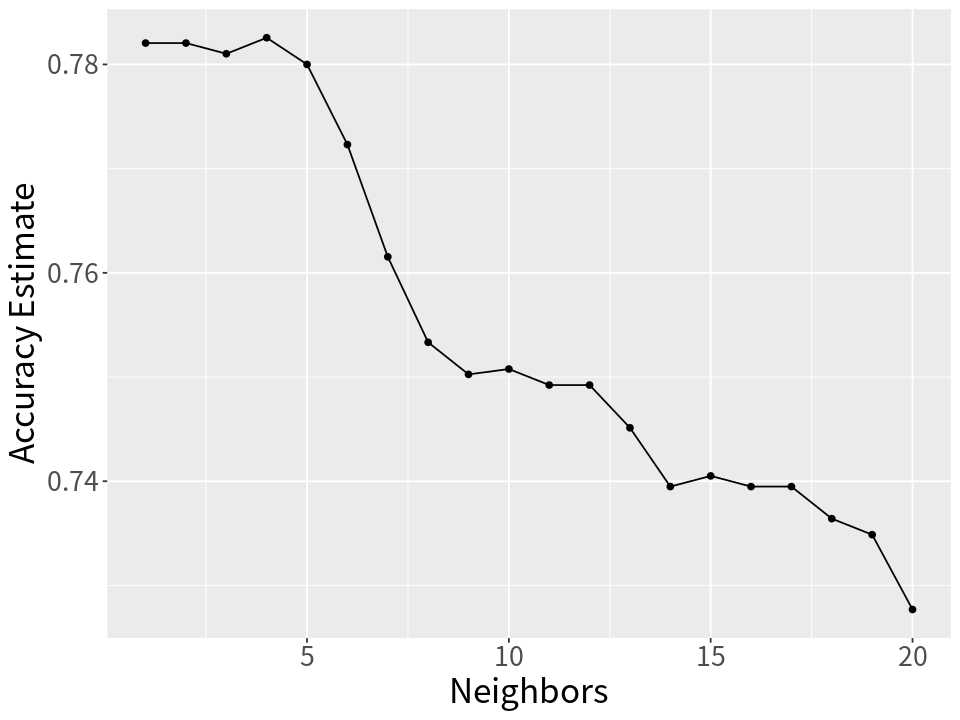

In [15]:
# visualize the change of accuracy on validation data set as change of K
options(repr.plot.width = 8, repr.plot.height = 6)

chr_result_2600_viz <- chr_result_2600 |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))

chr_result_2600_viz

<div align="center">Figure 6.1: Relationship between neighbors and accuracy for 2600 data set.

In [16]:
# pull out the best K
best_k <- chr_result_2600 |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)

cat("The best K aftering tuning with cross-validation is", best_k)

The best K aftering tuning with cross-validation is 4

##### 6.2 Use the best $k$ we found to training the KNN classifier based on $2600$ rows of data set and evaluation

In [17]:
# models
set.seed(2023)

chr_knn_best_k_2600_spec <- nearest_neighbor(weight_func = "rectangular",neighbors = best_k)|>
    set_engine("kknn")|>
    set_mode("classification")

# recipe (scaling and centering are not necessary for this data frame)
chr_recipe1 <- recipe(label~.,data = chr_train_2600)

# workflow
chr_wf1 <- workflow()|>
    add_recipe(chr_recipe1)|>
    add_model(chr_knn_best_k_2600_spec) |>
    fit(data = chr_train_2600)


Predict the randomly splited testing data set to evaluate the accuracy of our first model which is built on the smallest data size.

In [18]:
# predict, evaluation
chr_knn_best_k_2600_result <- predict(chr_wf1,chr_test_2600)|>
    bind_cols(chr_test_2600)|>
    metrics(truth = label,estimate = .pred_class)|>
    filter(.metric=="accuracy") |>
    bind_cols(tibble(data_size = 2600, log_reg = "No")) |>
    select(data_size, log_reg, .metric, .estimator, .estimate)

chr_knn_best_k_2600_result 

data_size,log_reg,.metric,.estimator,.estimate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2600,No,accuracy,multiclass,0.7876923


<div align="center">Figure 6.2: Best k accuracy for 2600 observations data set.

##### 6.3 Build logistic regression model on the entire data set ($26,000$ observations)

As mentioned in section 3.2, in the further anaylsis, the logistic regression is used to estimates the probability of letter  recognition occurring. Since it pricdict the quantitative probability, it is not necessary to evaluate its performance. Therefore, use the entire data size of 26 thousand observations to train this logistic regression model.

In [19]:
nrow(chr_tidy_data)

[1] 26000

In [20]:
# buiding logistic regression model
set.seed(2023)

chr_lrm_26000 <- glm(label ~., data = chr_tidy_data, family = binomial)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


##### 6.4 Use logistic regression predict the probability of $(2600)$ test data set 

Use the logistic regression estimates the probability of letter recognition occurring for each new observations in the testing data set which is extracted from 2600 data sets.

In [21]:
# Predict test which is split from 2600 data set using logical regression model
filter_test_2600 <- predict(chr_lrm_26000, chr_test_2600, type = "response")

filter_test_2600_prob <- data.frame(probability = filter_test_2600) |>
                bind_cols(chr_test_2600)

filter_test_2600_prob

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


,probability,label,1,2,3,4,5,6,7,8,⋯,775,776,777,778,779,780,781,782,783,784
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.054149230,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0.271459502,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0.005170381,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0.030106381,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0.388292089,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
646,0.9999998,z,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
647,0.9999995,z,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
648,0.9999993,z,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


<div align="center">Figure 6.4.1: 2600 data table assigned with probability calculated using logistic regression.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



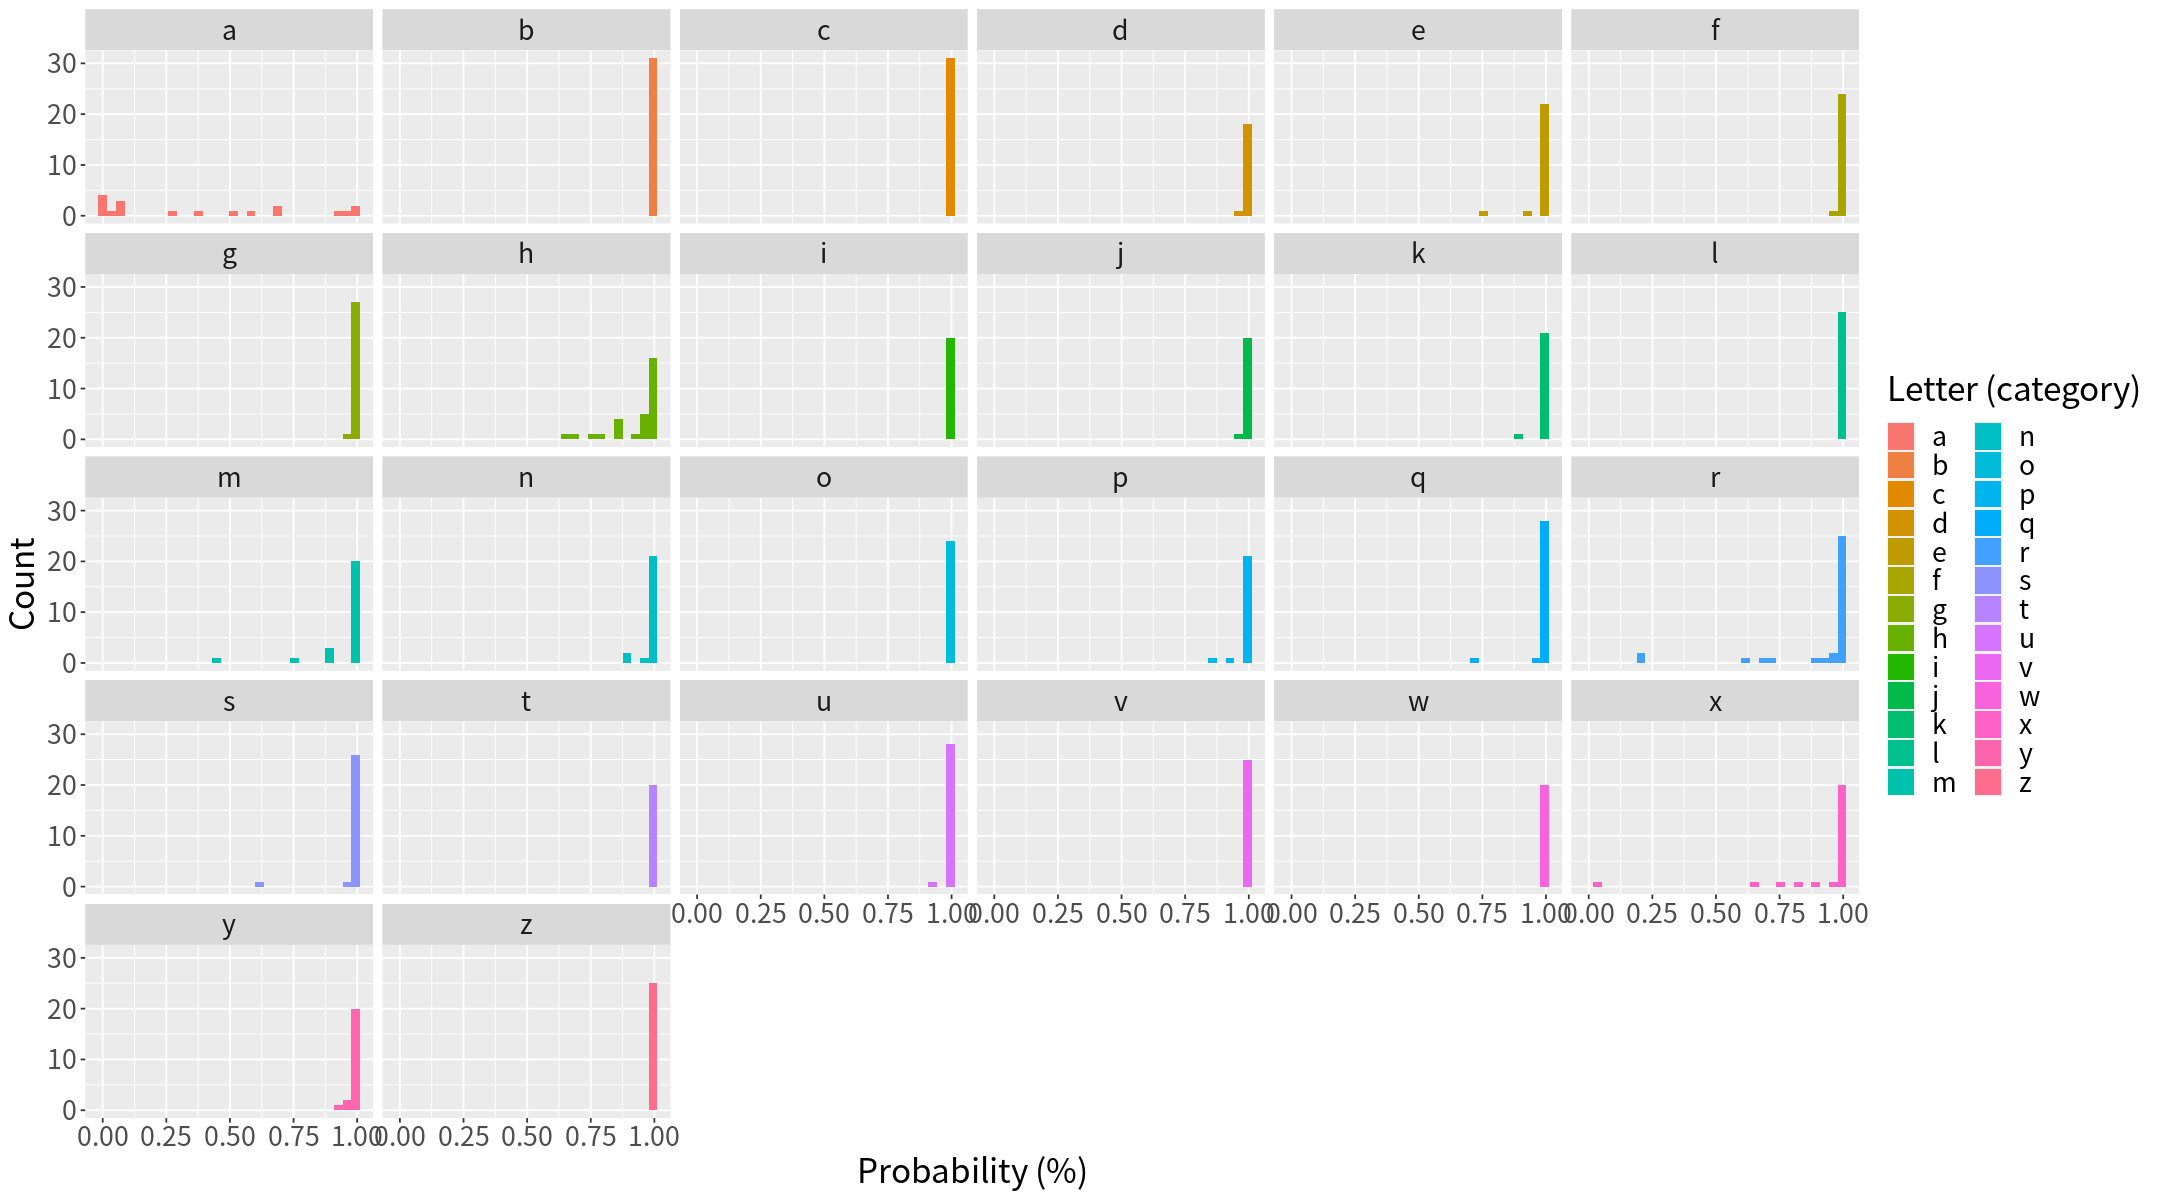

In [22]:
# visualize the count distribution of different probabilities
options(repr.plot.height = 10, repr.plot.width = 18)

filter_test_2600_prob_plot1 <- filter_test_2600_prob |>
    ggplot(aes(x = probability,fill = label)) +
    geom_histogram() +
    facet_wrap(~label) +
    labs(x = "Probability (%)",
         y = "Count",
         fill = "Letter (category)") +
    theme(text = element_text(size = 20))

filter_test_2600_prob_plot1

<div align="center">Figure 6.4.2: Distribution of logistic regression probabiliteis by alphabet(2600).

Check what does the outliers (probability < 60%) labeled by logistic regression model look like.

# A tibble: 1 × 2
  label probability
  <fct>       <dbl>
1 a         0.00517


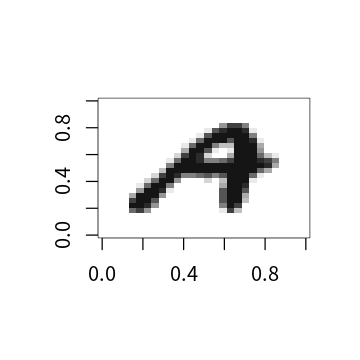

# A tibble: 1 × 2
  label probability
  <fct>       <dbl>
1 m           0.437


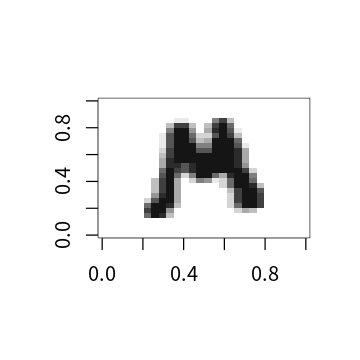

# A tibble: 1 × 2
  label probability
  <fct>       <dbl>
1 r           0.205


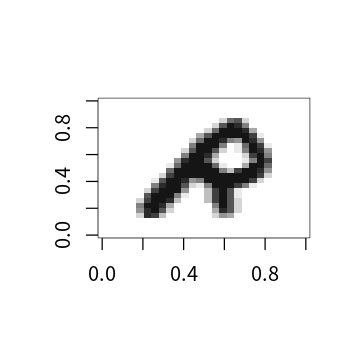

In [23]:
# check the observation marked as low probability if it is hard to recognize for algorithm
three_low_pro_letter <- filter_test_2600_prob |>
    arrange(probability) |>
    group_by(label) |>
    do(head(., n = 1)) |>
    filter(probability < 0.6) |>
    ungroup(label)

options(repr.plot.width = 3, repr.plot.height = 3)
for (i in 1:3){
    show_digit(slice(select(three_low_pro_letter, -c(probability, label)), i))
    print(slice(select(three_low_pro_letter, c(label, probability)), i))
    }

<div align="center">Figure 6.4.3: Visualization of unclear(low logistic regression probabilities) handwriting.

##### 6.5 Use the probability predicted by logistic regression to filter test data beased on the different level of probability, evaluate the KNN classifier again to test whether the accuracy is improved.

- generate a tibble of proportions which are used to filter observations based on the probability in testing data size
- creat a list of different testing data set which are filtered by different proportions for probability
- creat another list of predict those filtered testing data set and merge the results with original testing data set
- evaluate and collect the result metrics 
- print out the result data frame

In [24]:
# probability tibble
pro_tib <- tibble(prob = seq(from = 0.1, to = 0.9, by = 0.1))

#test the previous KNN classifier with different testing data sets which are filtered with different level of probability
pro_test_2600_acy <- pro_tib |>
    rowwise() |>
    mutate(filtered_test = list(filter(filter_test_2600_prob, probability >= prob)),
           test_pred = list(predict(chr_wf1, filtered_test)),
           bind_pred = list(bind_cols(test_pred, filtered_test)),
           result_metric = list(metrics(data = bind_pred, truth = label,estimate = .pred_class)), 
           test_data_size = list(nrow(bind_pred))) |>
    unnest(result_metric) |>
    select(prob, test_data_size, .metric, .estimator, .estimate) |>
    filter(.metric == "accuracy") |>
    mutate(test_data_size = as.integer(test_data_size))

pro_test_2600_acy

prob,test_data_size,.metric,.estimator,.estimate
<dbl>,<int>,<chr>,<chr>,<dbl>
0.1,641,accuracy,multiclass,0.7847114
0.2,641,accuracy,multiclass,0.7847114
0.3,638,accuracy,multiclass,0.7884013
0.4,637,accuracy,multiclass,0.7880691
0.5,636,accuracy,multiclass,0.7893082
0.6,634,accuracy,multiclass,0.7917981
0.7,626,accuracy,multiclass,0.7955272
0.8,619,accuracy,multiclass,0.7964459
0.9,607,accuracy,multiclass,0.8006590


<div align="center">Figure 6.5.1: Probabilities for each filter threshold (2600 data set).

Visualize the relationship between proportion and accuracy.

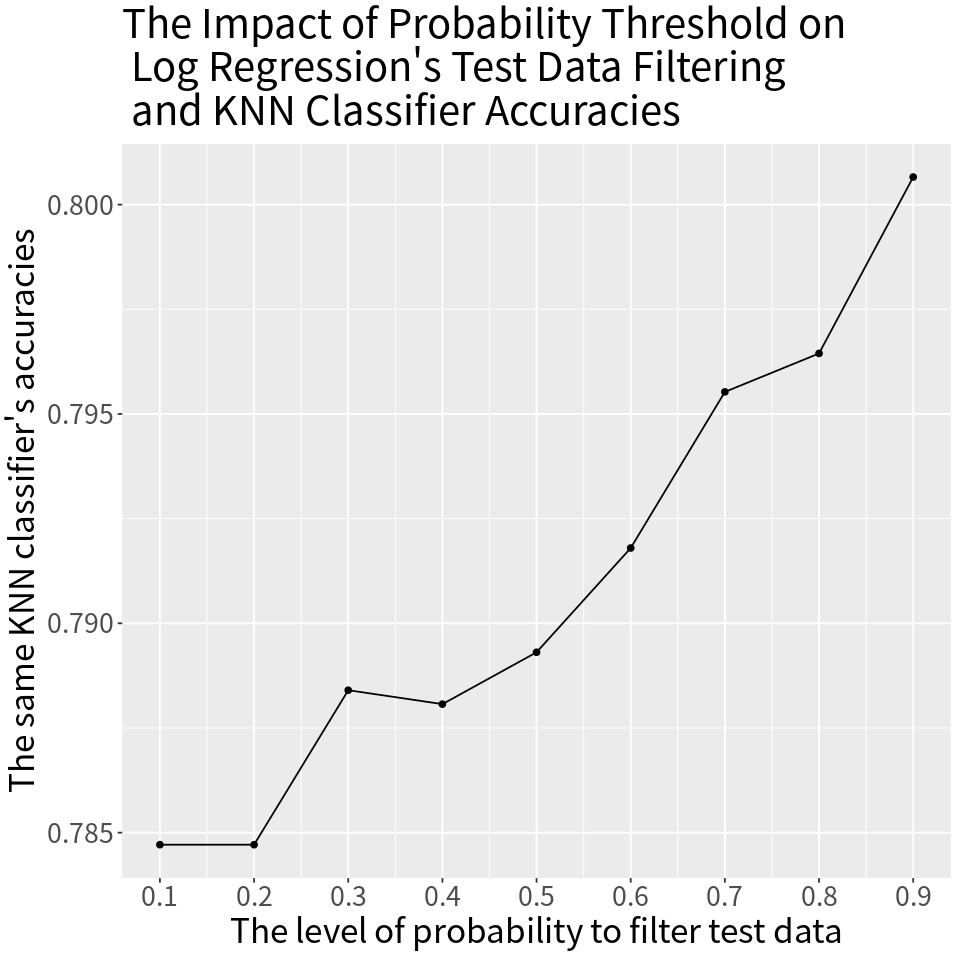

In [25]:
# visualize the level of probability of filter vs. accuracy
options(repr.plot.height = 8, repr.plot.width = 8)

pro_test_2600_acy_plot <- pro_test_2600_acy |>
    mutate(test_data_size = as.integer(test_data_size)) |>
    ggplot() +
    geom_point(aes(x = prob, y = .estimate )) +
    geom_line(aes(x = prob, y = .estimate)) +
    labs(x = "The level of probability to filter test data",
         y = "The same KNN classifier's accuracies") +
    ggtitle("The Impact of Probability Threshold on \n Log Regression's Test Data Filtering \n and KNN Classifier Accuracies") +
    theme(text = element_text(size = 20))+
    scale_x_continuous(breaks = seq(0, 1, by = 0.1))

pro_test_2600_acy_plot

<div align="center">Figure 6.5.2: Probabilities for each filter threshold against accuracy plot(2600 data set).

Visualize probabilities for each filter threshold against number of manually recognized data(2600 data set).

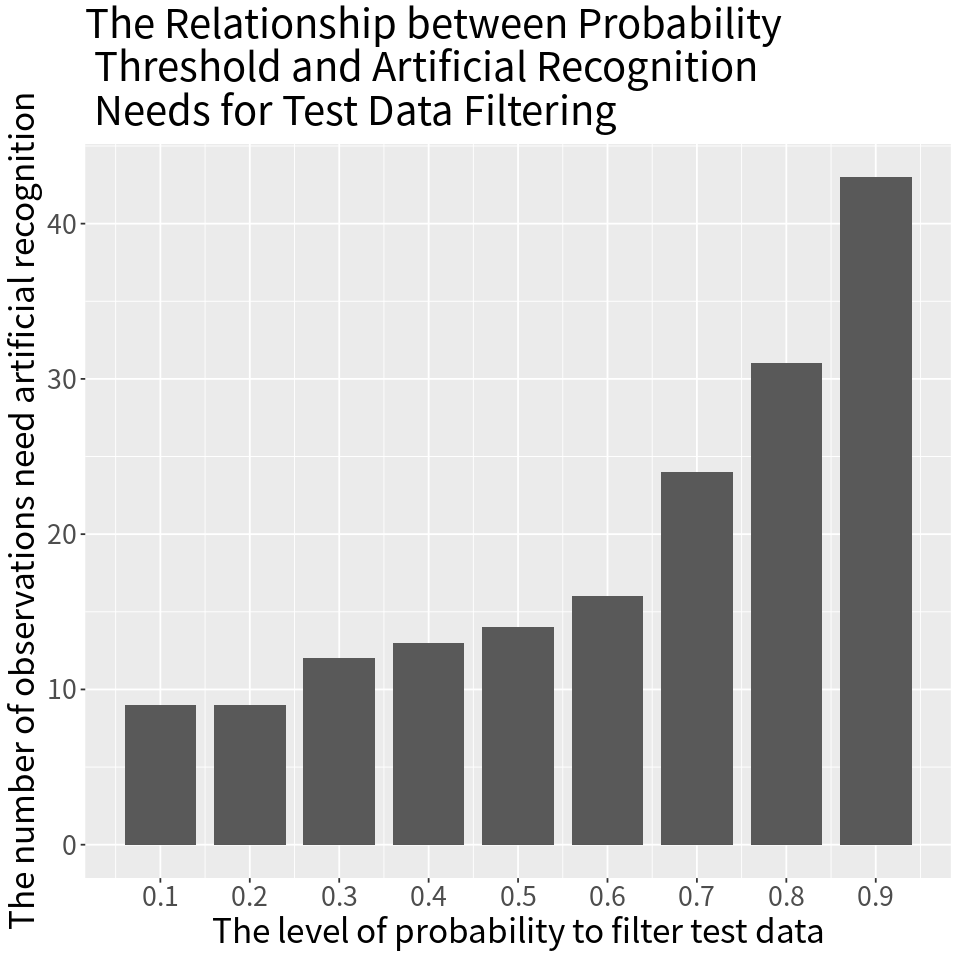

In [26]:
options(repr.plot.height = 8, repr.plot.width = 8)

pro_2600_test_size_plot <- pro_test_2600_acy |>
    mutate(test_data_size = as.integer(test_data_size)) |>
    ggplot() +
    geom_bar(aes(x = prob, y = 650 - test_data_size), stat = "identity", width = 0.08) +
    labs(x = "The level of probability to filter test data",
         y = "The number of observations need artificial recognition") +
    ggtitle("The Relationship between Probability \n Threshold and Artificial Recognition \n Needs for Test Data Filtering") +
    theme(text = element_text(size = 20))+
    scale_x_continuous(breaks = seq(0, 1, by = 0.1))

pro_2600_test_size_plot

<div align="center">Figure 6.5.3: Probabilities for each filter threshold against number of manually recognized data(2600 data set).

Display these two graphs side by side.

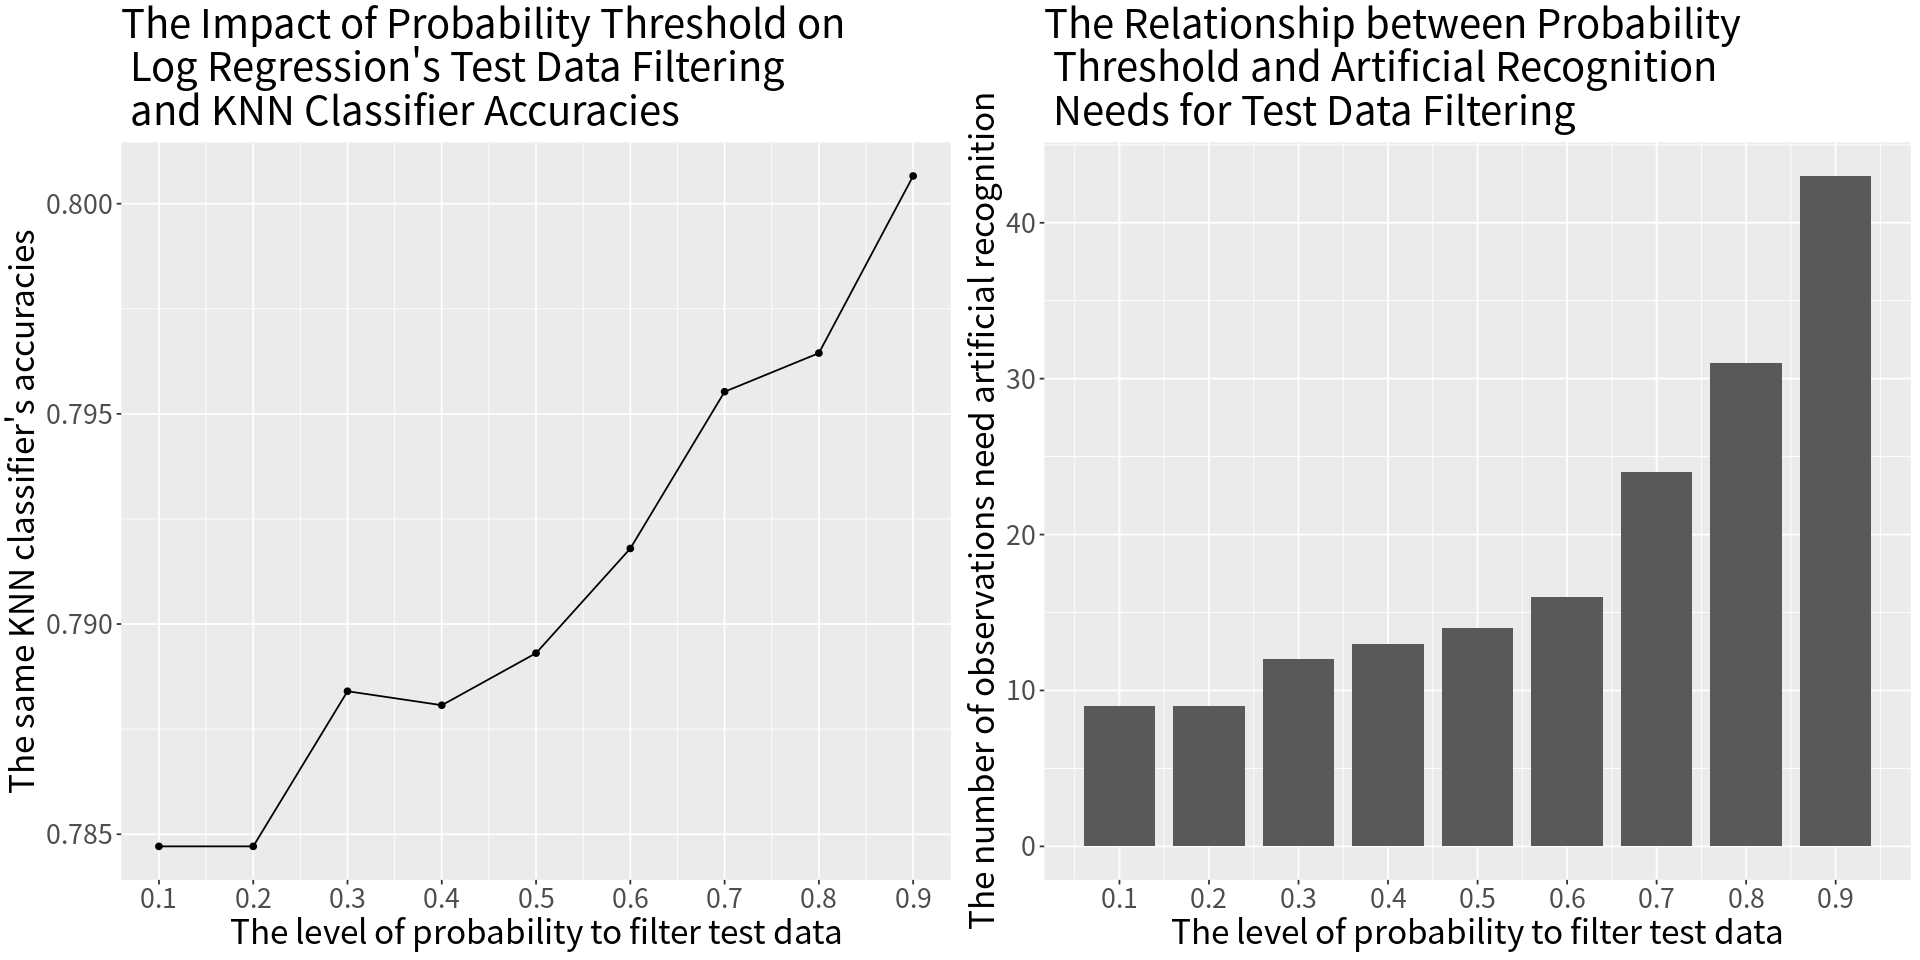

In [27]:
options(repr.plot.height = 8, repr.plot.width = 16)
plot_grid(pro_test_2600_acy_plot, pro_2600_test_size_plot, ncol = 2)

<div align="center">Figure 6.5.4: Summary of Figure  6.5.2 and Figure  6.5.3.

##### 6.6 Increase the training data set $(13000) \; \textbf{observations}$ for KNN classifier

- Randomly split the data size into training and testing data sets for our first models `initial_split`
- Select the best k of 2600 data set (we can't run cross validation for bigger data set due to data overload).
- Train our model `chr_wf_13000` based on the smallest data size of 13000 rows of observations.

In [28]:
# split the data of 13000 rows into training and testing data sets
set.seed(2023)

chr_initial_13000 <- initial_split(chr_data_set_13000, prop = 0.75, strata = label)
chr_train_13000 <- training(chr_initial_13000)
chr_test_13000 <- testing(chr_initial_13000)

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


In [29]:
# models
set.seed(2023)

chr_knn_best_k_13000_spec <- nearest_neighbor(weight_func = "rectangular",neighbors = best_k)|>
    set_engine("kknn")|>
    set_mode("classification")

# recipe (scaling and centering are not necessary for this data frame)
chr_recipe2 <- recipe(label~.,data = chr_train_13000)

# workflow
chr_wf_13000 <- workflow()|>
    add_recipe(chr_recipe2)|>
    add_model(chr_knn_best_k_13000_spec) |>
    fit(data = chr_train_13000)

Predict the randomly splited testing data set to evaluate the accuracy of our second model which is built on the second biggest data size.

In [30]:
# predict, evaluation
chr_knn_best_k_13000_result <- predict(chr_wf_13000,chr_test_13000)|>
    bind_cols(chr_test_13000)|>
    metrics(truth = label,estimate = .pred_class)|>
    filter(.metric=="accuracy") |>
    bind_cols(tibble(data_size = 13000, log_reg = "No")) |>
    select(data_size, log_reg, .metric, .estimator, .estimate)

chr_knn_best_k_13000_result 

data_size,log_reg,.metric,.estimator,.estimate
<dbl>,<chr>,<chr>,<chr>,<dbl>
13000,No,accuracy,multiclass,0.8858462


<div align="center">Figure 6.6.1: Best k accuracy for 13000 observations data set.

In [31]:
# combine the all result of models
all_result <- bind_rows(chr_knn_best_k_2600_result, chr_knn_best_k_13000_result)

all_result

data_size,log_reg,.metric,.estimator,.estimate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2600,No,accuracy,multiclass,0.7876923
13000,No,accuracy,multiclass,0.8858462


<div align="center">Figure 6.6.2: Best k accuracy for 13000 and 2600 observations data set.

Use the logistic regression estimates the probability of letter recognition occurring for each new observations in the testing data set which is extracted from 13000 data sets.

In [32]:
# Predict test which is split from 13000 data set using logical regression model
filter_test_13000 <- predict(chr_lrm_26000, chr_test_13000, type = "response")

filter_test_13000_prob <- data.frame(probability = filter_test_13000) |>
                bind_cols(chr_test_13000)

filter_test_13000_prob

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


,probability,label,1,2,3,4,5,6,7,8,⋯,775,776,777,778,779,780,781,782,783,784
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1553042,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0.2556815,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0.9177585,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0.1639127,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0.6274047,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3246,0.9999995,z,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3247,0.9999879,z,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3248,1.0000000,z,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


<div align="center">Figure 6.6.3: 13000 data table assigned with probability calculated using logical regression.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



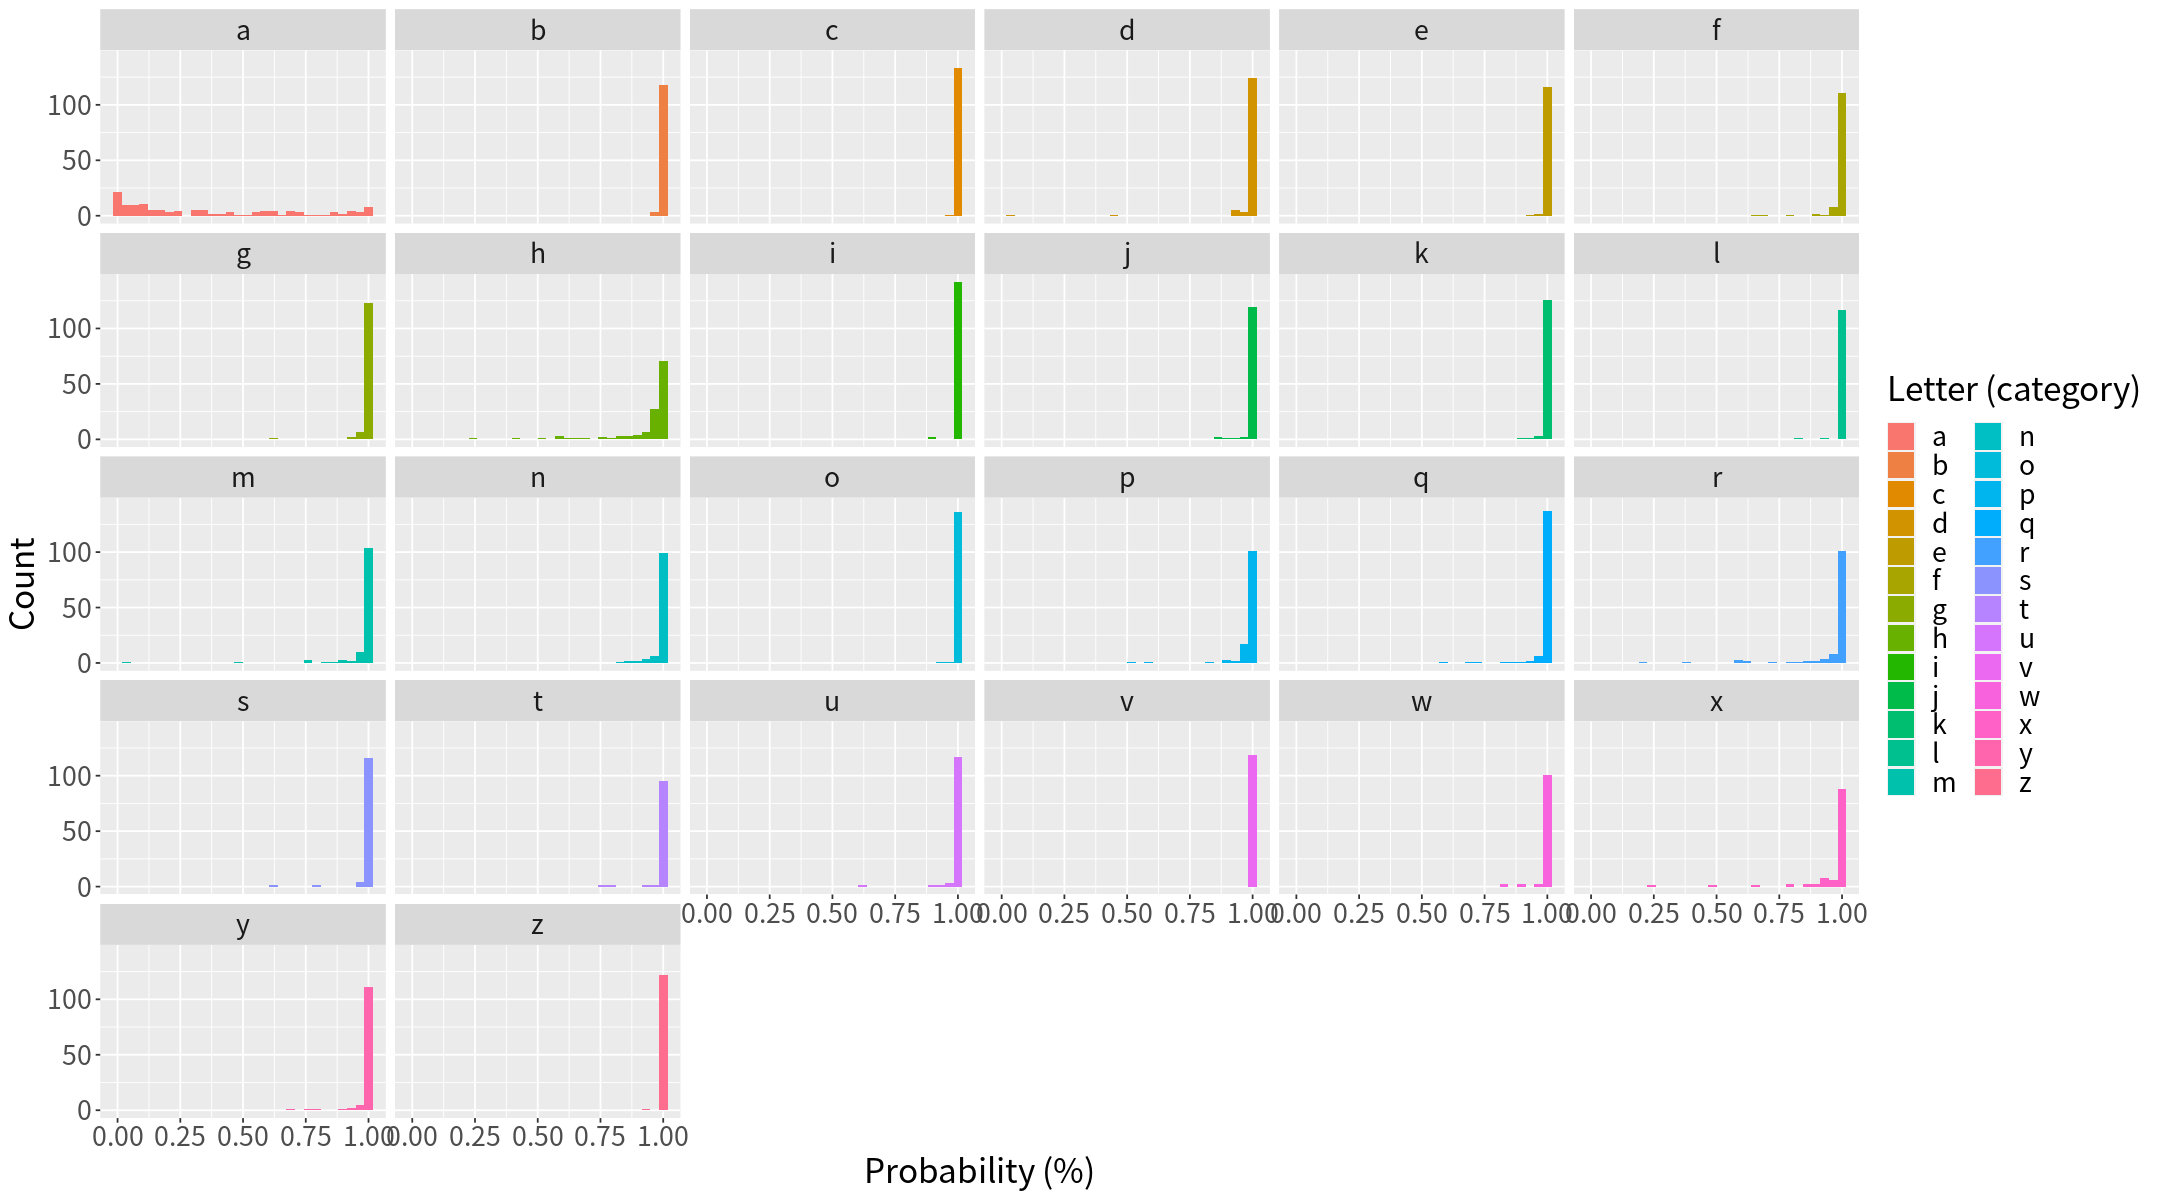

In [33]:
# visualize the count distribution of different probabilities
options(repr.plot.height = 10, repr.plot.width = 18)

filter_test_13000_prob_plot <- filter_test_13000_prob |>
    ggplot(aes(x = probability,fill = label)) +
    geom_histogram() +
    facet_wrap(~label) +
    labs(x = "Probability (%)",
         y = "Count",
         fill = "Letter (category)") +
    theme(text = element_text(size = 20))

filter_test_13000_prob_plot

<div align="center">Figure 6.6.4: Distribution of logistic regression probabiliteis by alphabet(13000).

- generate a tibble of proportions which are used to filter observations based on the probability in testing data size
- creat a list of different testing data set which are filtered by different proportions for probability
- creat another list of predict those filtered testing data set and merge the results with original testing data set
- evaluate and collect the result metrics 
- print out the result data frame

In [34]:
# probability tibble
pro_tib <- tibble(prob = seq(from = 0.1, to = 0.9, by = 0.1))

#test the previous KNN classifier with different testing data sets which are filtered with different level of probability
pro_test_13000_acy <- pro_tib |>
    rowwise() |>
    mutate(filtered_test = list(filter(filter_test_13000_prob, probability >= prob)),
           test_pred = list(predict(chr_wf_13000, filtered_test)),
           bind_pred = list(bind_cols(test_pred, filtered_test)),
           result_metric = list(metrics(data = bind_pred, truth = label,estimate = .pred_class)), 
           test_data_size = list(nrow(bind_pred))) |>
    unnest(result_metric) |>
    select(prob, test_data_size, .metric, .estimator, .estimate) |>
    filter(.metric == "accuracy") |>
    mutate(test_data_size = as.integer(test_data_size))

pro_test_13000_acy

prob,test_data_size,.metric,.estimator,.estimate
<dbl>,<int>,<chr>,<chr>,<dbl>
0.1,3200,accuracy,multiclass,0.8850000
0.2,3185,accuracy,multiclass,0.8844584
0.3,3175,accuracy,multiclass,0.8844094
0.4,3163,accuracy,multiclass,0.8849194
0.5,3153,accuracy,multiclass,0.8845544
0.6,3136,accuracy,multiclass,0.8852041
0.7,3114,accuracy,multiclass,0.8859987
0.8,3093,accuracy,multiclass,0.8874879
0.9,3049,accuracy,multiclass,0.8888160


<div align="center">Figure 6.6.5: Probabilities for each filter threshold (13000 data set).

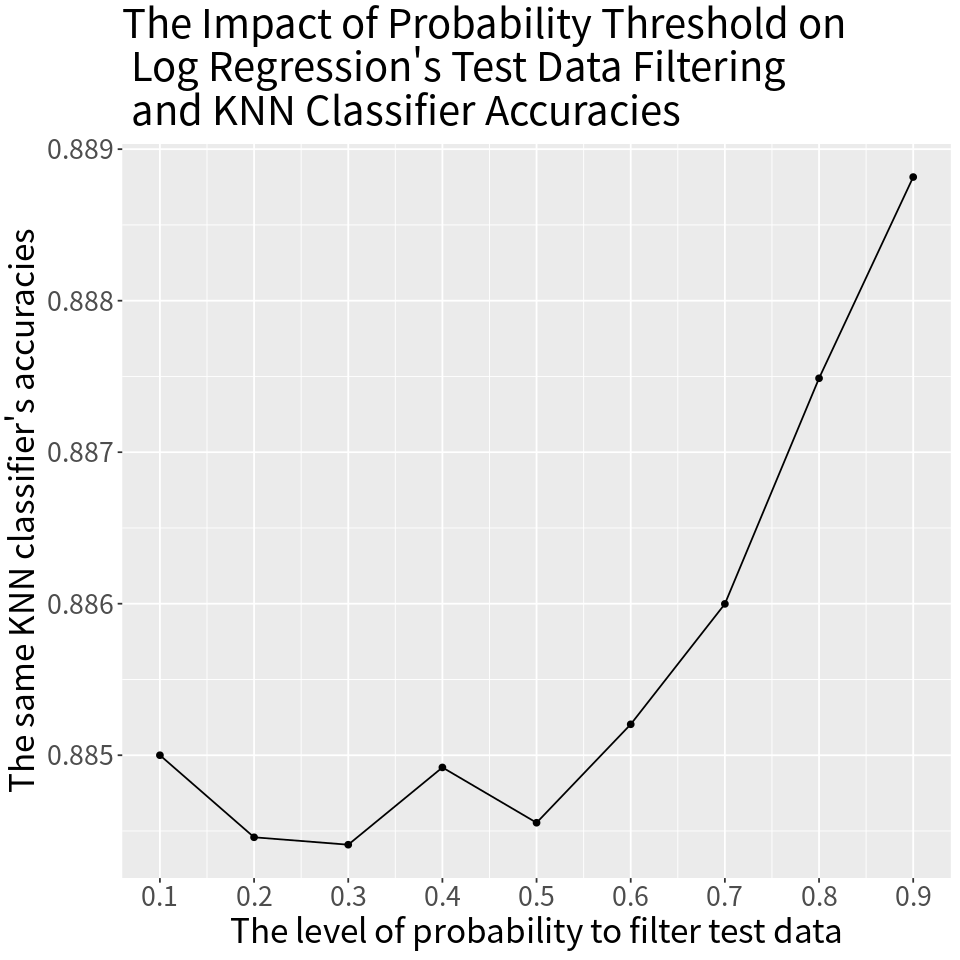

In [35]:
# visualize the level of probability of filter vs. accuracy
options(repr.plot.height = 8, repr.plot.width = 8)

pro_test_13000_acy_plot <- pro_test_13000_acy |>
    mutate(test_data_size = as.integer(test_data_size)) |>
    ggplot() +
    geom_point(aes(x = prob, y = .estimate )) +
    geom_line(aes(x = prob, y = .estimate)) +
    labs(x = "The level of probability to filter test data",
         y = "The same KNN classifier's accuracies") +
    ggtitle("The Impact of Probability Threshold on \n Log Regression's Test Data Filtering \n and KNN Classifier Accuracies") +
    theme(text = element_text(size = 20)) +
    scale_x_continuous(breaks = seq(0, 1, by = 0.1))

pro_test_13000_acy_plot

<div align="center">Figure 6.6.6: Probabilities for each filter threshold against accuracy plot(13000 data set).

Visualize probabilities for each filter threshold against number of manually recognized data(13000 data set).

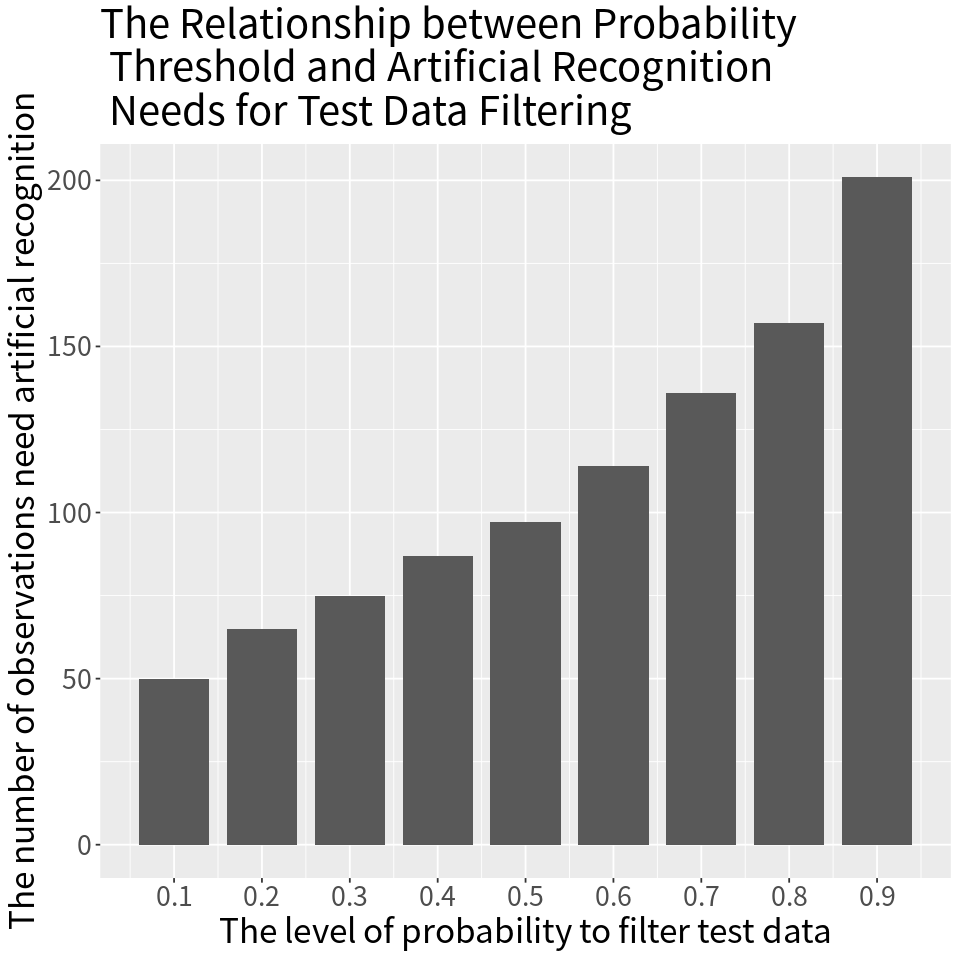

In [36]:
options(repr.plot.height = 8, repr.plot.width = 8)

pro_13000_test_size_plot <- pro_test_13000_acy |>
    mutate(test_data_size = as.integer(test_data_size)) |>
    ggplot() +
    geom_bar(aes(x = prob, y = 3250 - test_data_size), stat = "identity", width = 0.08) +
    labs(x = "The level of probability to filter test data",
         y = "The number of observations need artificial recognition") +
    ggtitle("The Relationship between Probability \n Threshold and Artificial Recognition \n Needs for Test Data Filtering") +
    theme(text = element_text(size = 20)) +
    scale_x_continuous(breaks = seq(0, 1, by = 0.1))

pro_13000_test_size_plot

<div align="center">Figure 6.6.7: Probabilities for each filter threshold against number of manually recognized data(13000 data set).

Display these two graphs side by side.

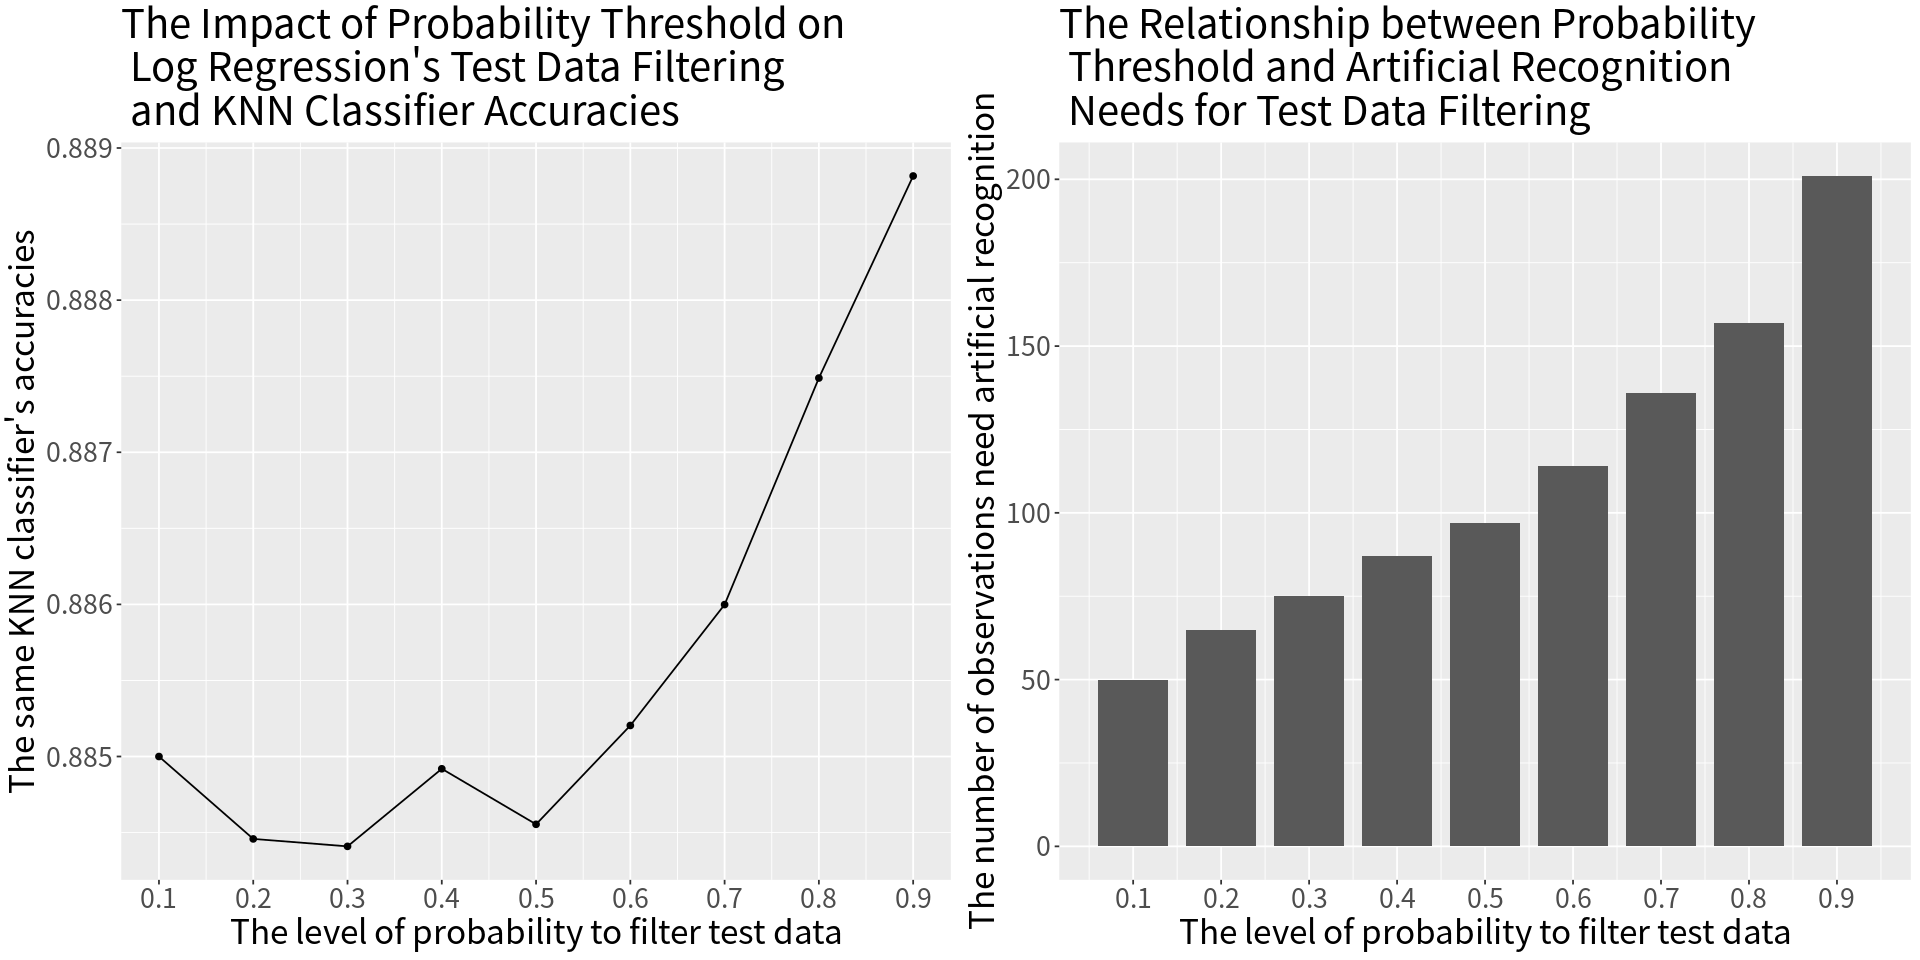

In [37]:
options(repr.plot.height = 8, repr.plot.width = 16)
plot_grid(pro_test_13000_acy_plot, pro_13000_test_size_plot, ncol = 2)

<div align="center">Figure 6.6.8: Summary of Figure 6.6.7 and Figure 6.6.6.

##### 6.7 Use the entire data set  $(26000) \; \textbf{observations}$  KNN classifier

- Randomly split the data size into training and testing data sets for our first models `initial_split`
- Select the best k of 2600 data set (we can't run cross validation for bigger data set due to data overload)
- Train our model `chr_wf_26000` based on the smallest data size of 26000 rows of observations

In [38]:
# split the data of 26000 rows into training and testing data sets
set.seed(2023)

chr_initial_26000 <- initial_split(chr_tidy_data, prop = 0.75, strata = label)
chr_train_26000 <- training(chr_initial_26000)
chr_test_26000 <- testing(chr_initial_26000)

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


In [39]:
# models
set.seed(2023)

chr_knn_best_k_26000_spec <- nearest_neighbor(weight_func = "rectangular",neighbors = best_k)|>
    set_engine("kknn")|>
    set_mode("classification")

# recipe (scaling and centering are not necessary for this data frame)
chr_recipe3 <- recipe(label~.,data = chr_train_26000)

# workflow
chr_wf_26000 <- workflow()|>
    add_recipe(chr_recipe3)|>
    add_model(chr_knn_best_k_26000_spec) |>
    fit(data = chr_train_26000)

Predict the randomly splited testing data set to evaluate the accuracy of our third model which is built on the biggest data size.

In [40]:
# predict, evaluation
chr_knn_best_k_26000_result <- predict(chr_wf_26000,chr_test_26000)|>
    bind_cols(chr_test_26000)|>
    metrics(truth = label,estimate = .pred_class)|>
    filter(.metric=="accuracy") |>
    bind_cols(tibble(data_size = 26000, log_reg = "No")) |>
    select(data_size, log_reg, .metric, .estimator, .estimate)

chr_knn_best_k_26000_result

data_size,log_reg,.metric,.estimator,.estimate
<dbl>,<chr>,<chr>,<chr>,<dbl>
26000,No,accuracy,multiclass,0.9033846


<div align="center">Figure 6.7.1: Best k accuracy for 26000 observations data set.

In [41]:
# combine the all result of models
all_result <- bind_rows(all_result, chr_knn_best_k_26000_result)

all_result

data_size,log_reg,.metric,.estimator,.estimate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2600,No,accuracy,multiclass,0.7876923
13000,No,accuracy,multiclass,0.8858462
26000,No,accuracy,multiclass,0.9033846


Use the logistic regression estimates the probability of letter recognition occurring for each new observations in the testing data set which is extracted from 26000 data sets.

In [42]:
# Predict test which is split from 2600 data set using logical regression model
filter_test_26000 <- predict(chr_lrm_26000, chr_test_26000, type = "response")

filter_test_26000_prob <- data.frame(probability = filter_test_26000) |>
                bind_cols(chr_test_26000)

filter_test_26000_prob

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


,probability,label,1,2,3,4,5,6,7,8,⋯,775,776,777,778,779,780,781,782,783,784
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.05414923,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0.20260682,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0.27145950,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0.91775845,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0.16391266,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6496,0.9999994,z,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6497,1.0000000,z,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6498,0.9999548,z,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


<div align="center">Figure 6.7.2: 26000 data table assigned with probability calculated using logical regression.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



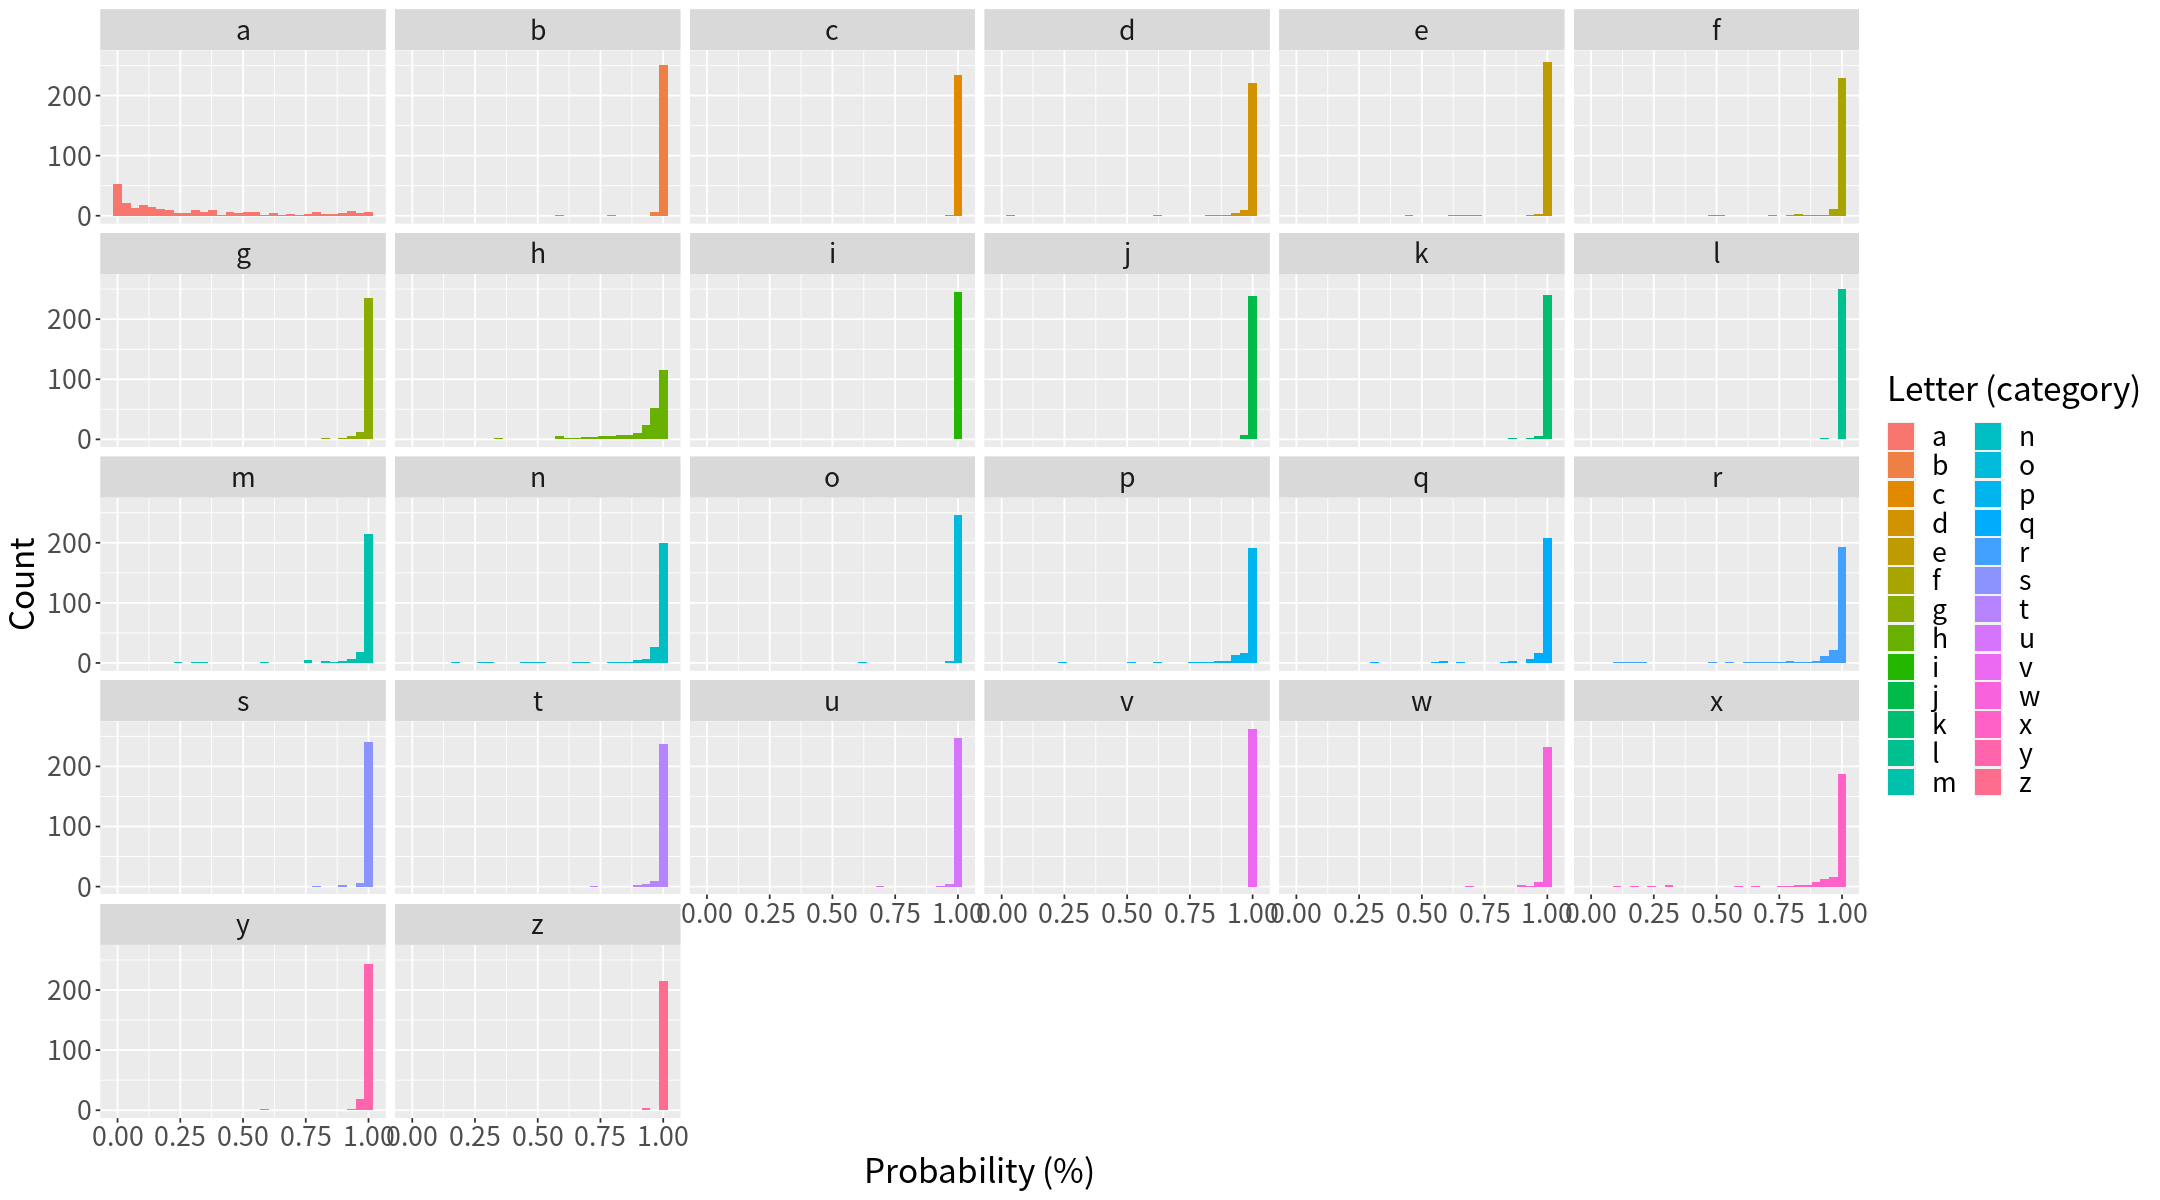

In [43]:
# visualize the count distribution of different probabilities
options(repr.plot.height = 10, repr.plot.width = 18)

filter_test_26000_prob_plot <- filter_test_26000_prob |>
    ggplot(aes(x = probability,fill = label)) +
    geom_histogram() +
    facet_wrap(~label) +
    labs(x = "Probability (%)",
         y = "Count",
         fill = "Letter (category)") +
    theme(text = element_text(size = 20))

filter_test_26000_prob_plot

<div align="center">Figure 6.7.1: Distribution of logistic regression probabiliteis by alphabet(13000).

- generate a tibble of proportions which are used to filter observations based on the probability in testing data size
- creat a list of different testing data set which are filtered by different proportions for probability
- creat another list of predict those filtered testing data set and merge the results with original testing data set
- evaluate and collect the result metrics 
- print out the result data frame

In [44]:
# probability tibble
pro_tib <- tibble(prob = seq(from = 0.1, to = 0.9, by = 0.1))

#test the previous KNN classifier with different testing data sets which are filtered with different level of probability
pro_test_26000_acy <- pro_tib |>
    rowwise() |>
    mutate(filtered_test = list(filter(filter_test_26000_prob, probability >= prob)),
           test_pred = list(predict(chr_wf_26000, filtered_test)),
           bind_pred = list(bind_cols(test_pred, filtered_test)),
           result_metric = list(metrics(data = bind_pred, truth = label,estimate = .pred_class)), 
           test_data_size = list(nrow(bind_pred))) |>
    unnest(result_metric) |>
    select(prob, test_data_size, .metric, .estimator, .estimate) |>
    filter(.metric == "accuracy") |>
    mutate(test_data_size = as.integer(test_data_size))

pro_test_26000_acy

prob,test_data_size,.metric,.estimator,.estimate
<dbl>,<int>,<chr>,<chr>,<dbl>
0.1,6401,accuracy,multiclass,0.9022028
0.2,6357,accuracy,multiclass,0.9018405
0.3,6332,accuracy,multiclass,0.9017688
0.4,6302,accuracy,multiclass,0.9017772
0.5,6281,accuracy,multiclass,0.9020857
0.6,6244,accuracy,multiclass,0.9026265
0.7,6209,accuracy,multiclass,0.9032050
0.8,6160,accuracy,multiclass,0.9040584
0.9,6069,accuracy,multiclass,0.9050914


Visualize the relationship between proportion and accuracy.

<div align="center">Figure 6.7.4: Probabilities for each filter threshold (26000 data set).

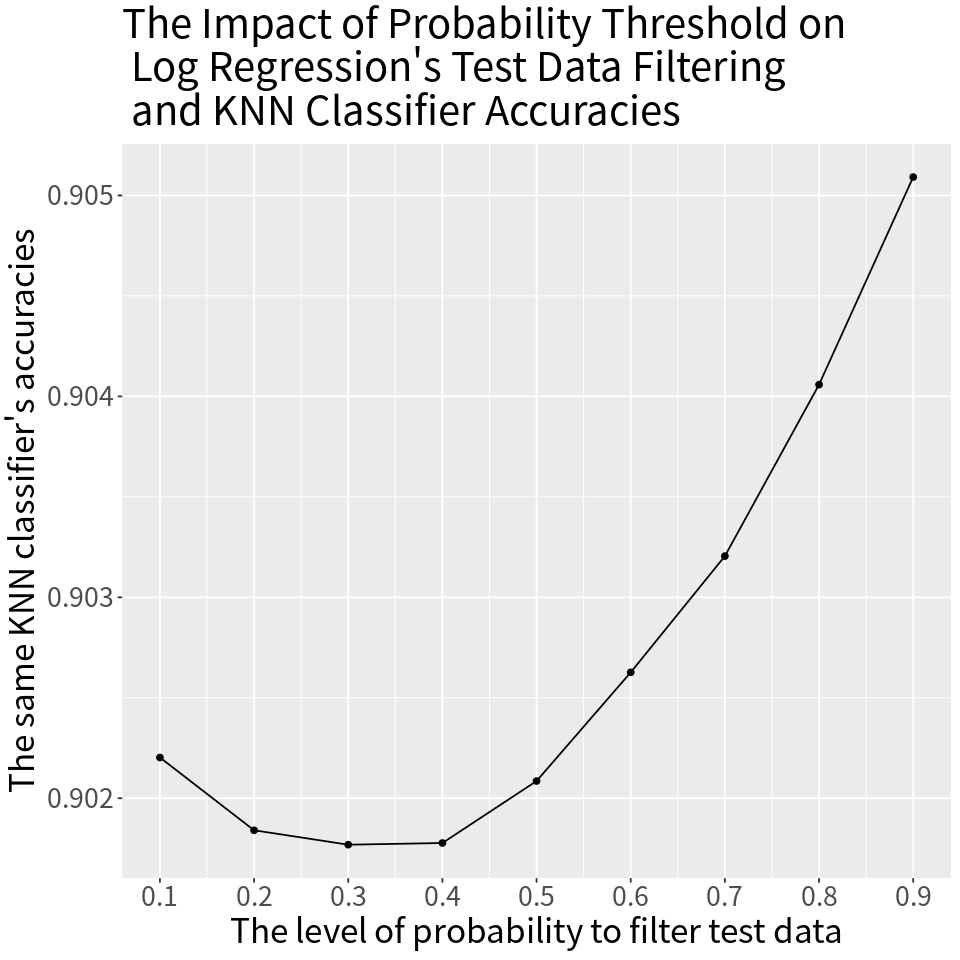

In [45]:
# visualize the level of probability of filter vs. accuracy
options(repr.plot.height = 8, repr.plot.width = 8)

pro_test_26000_acy_plot <- pro_test_26000_acy |>
    mutate(test_data_size = as.integer(test_data_size)) |>
    ggplot() +
    geom_point(aes(x = prob, y = .estimate )) +
    geom_line(aes(x = prob, y = .estimate)) +
    labs(x = "The level of probability to filter test data",
         y = "The same KNN classifier's accuracies") +
    ggtitle("The Impact of Probability Threshold on \n Log Regression's Test Data Filtering \n and KNN Classifier Accuracies") +
    theme(text = element_text(size = 20)) +
    scale_x_continuous(breaks = seq(0, 1, by = 0.1))

pro_test_26000_acy_plot

<div align="center">Figure 6.7.5: Probabilities for each filter threshold against accuracy plot(26000 data set).

Visualize probabilities for each filter threshold against number of manually recognized data(26000 data set).

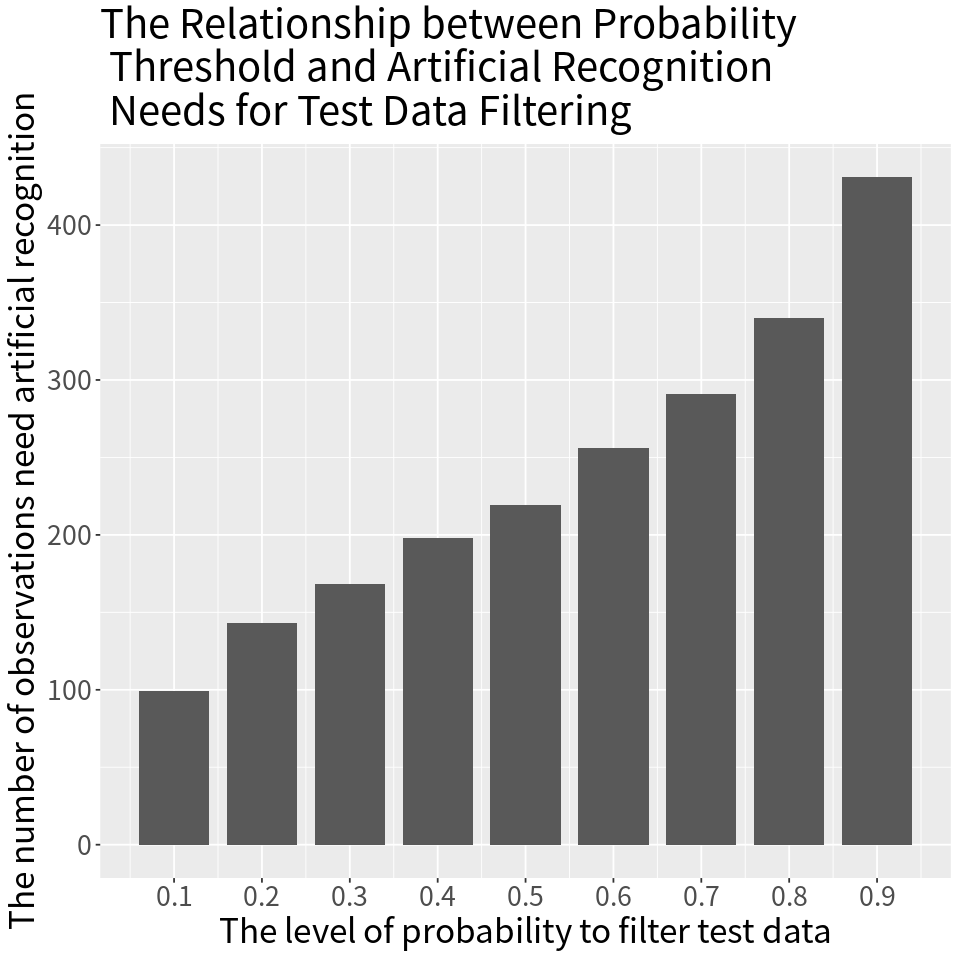

In [46]:
options(repr.plot.height = 8, repr.plot.width = 8)

pro_test_26000_acy_plot_data <- pro_test_26000_acy |>
    mutate(test_data_size = as.integer(test_data_size)) |>
    mutate(test_data_size_2 = 6500 - test_data_size) 

pro_26000_test_size_plot <- pro_test_26000_acy_plot_data|>
    ggplot() +
    geom_bar(aes(x = prob, y = test_data_size_2), stat = "identity", width = 0.08) +
    labs(x = "The level of probability to filter test data",
         y = "The number of observations need artificial recognition") +
    theme(text = element_text(size = 20)) + 
    ggtitle("The Relationship between Probability \n Threshold and Artificial Recognition \n Needs for Test Data Filtering") +
    scale_x_continuous(breaks = seq(0, 1, by = 0.1))

pro_26000_test_size_plot

<div align="center">Figure 6.7.6: Probabilities for each filter threshold against number of manually recognized data(26000 data set).

Display these two graphs side by side.

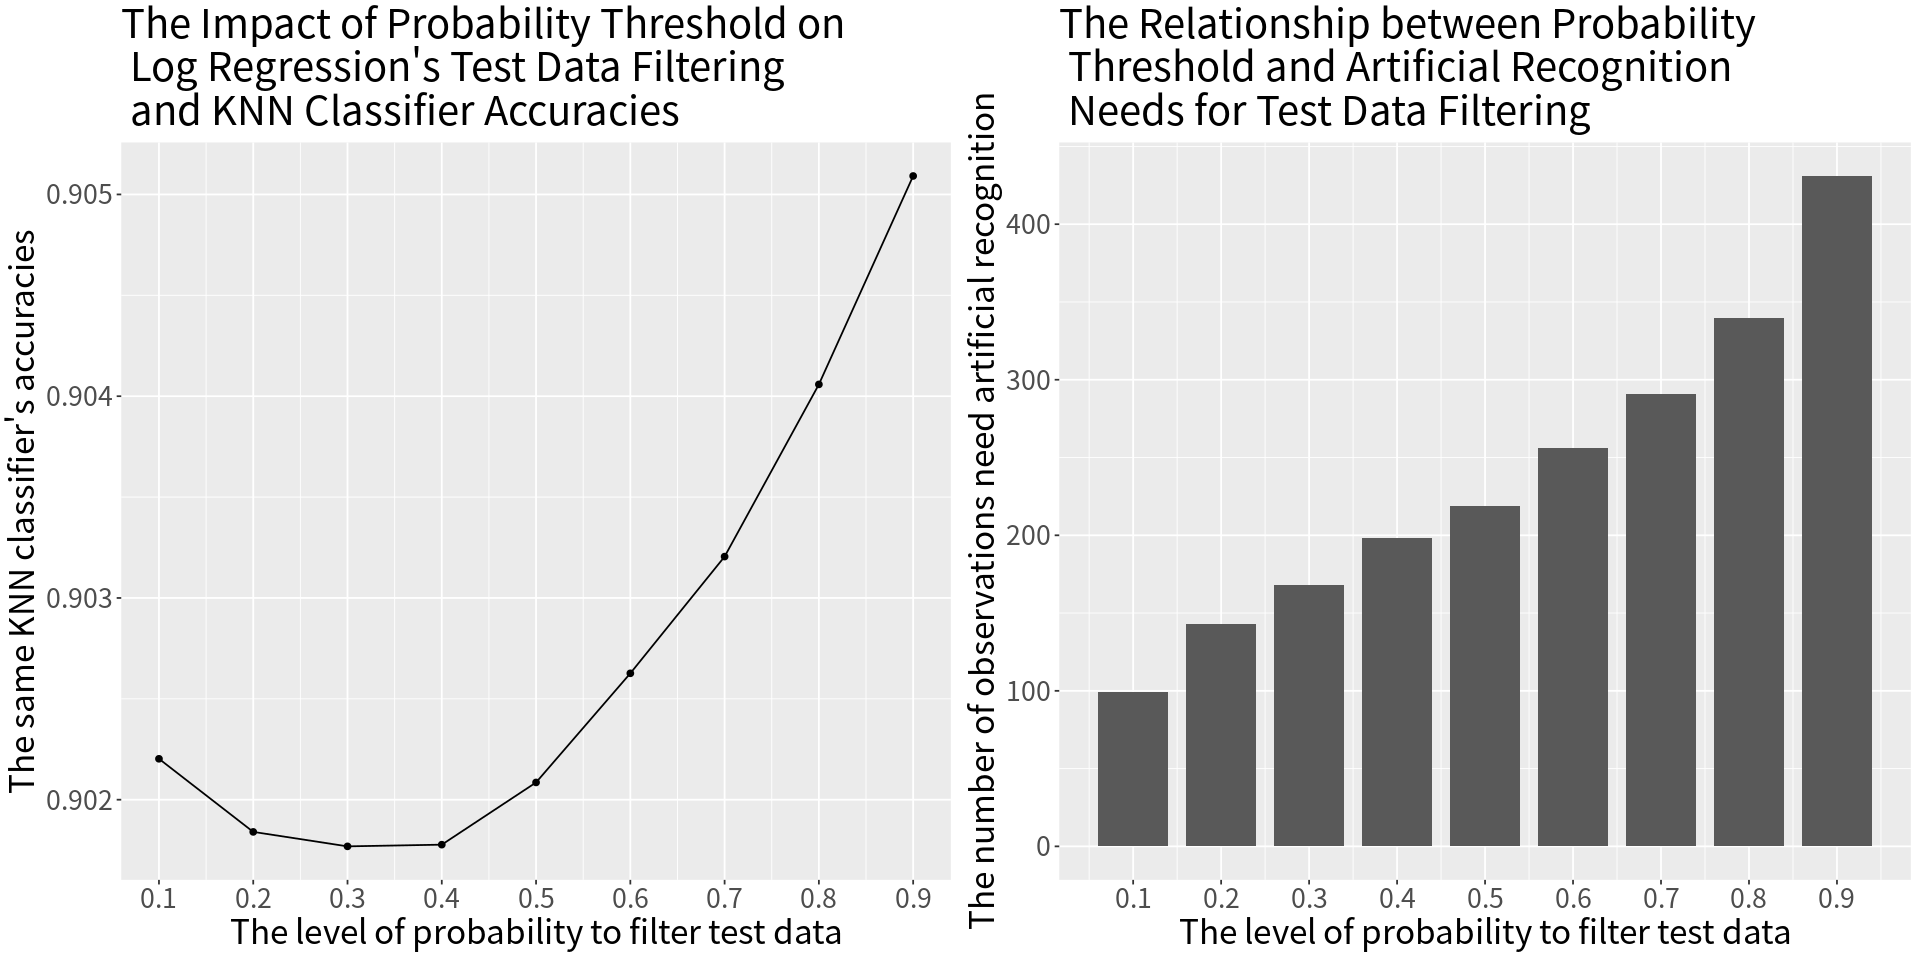

In [47]:
options(repr.plot.height = 8, repr.plot.width = 16)
plot_grid(pro_test_26000_acy_plot, pro_26000_test_size_plot, ncol = 2)

<div align="center">Figure 6.7.7: Summary of Figure 6.7.5 and Figure 6.7.6.

#### 7. result and visualization

In [48]:
all_result

data_size,log_reg,.metric,.estimator,.estimate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2600,No,accuracy,multiclass,0.7876923
13000,No,accuracy,multiclass,0.8858462
26000,No,accuracy,multiclass,0.9033846


<div align="center">Figure 7.1: Summary of best k accuracy for each size of data.

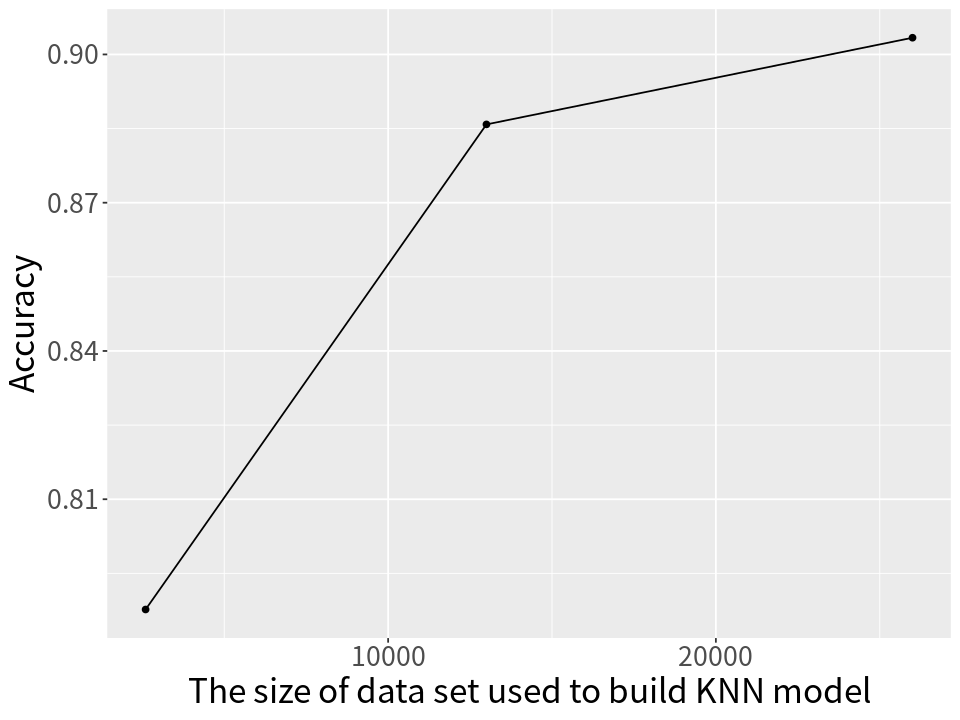

In [49]:
options(repr.plot.height = 6, repr.plot.width = 8)

all_result_plot <- all_result |>
    ggplot(aes(x = data_size, y = .estimate)) +
    geom_point() +
    geom_line() +
    labs(x = "The size of data set used to build KNN model",
         y = "Accuracy") +
    theme(text = element_text(size = 20))

all_result_plot

<div align="center">Figure 7.2: Plot of best k accuracy for each size of data.

In [50]:
all_result_lrm <- bind_rows(mutate(bind_cols(pro_test_2600_acy, tibble(data_size = rep(2600, each = 9))), art_reg = 650 - test_data_size),
                            mutate(bind_cols(pro_test_13000_acy, tibble(data_size = rep(13000, each = 9))),art_reg = 3250 - test_data_size),
                            mutate(bind_cols(pro_test_26000_acy, tibble(data_size = rep(26000, each = 9))), art_reg = 6500 - test_data_size)) |>
    mutate(data_size = factor(data_size)) |>
    select(data_size, prob, test_data_size, art_reg, .metric, .estimator, .estimate)

all_result_lrm

data_size,prob,test_data_size,art_reg,.metric,.estimator,.estimate
<fct>,<dbl>,<int>,<dbl>,<chr>,<chr>,<dbl>
2600,0.1,641,9,accuracy,multiclass,0.7847114
2600,0.2,641,9,accuracy,multiclass,0.7847114
2600,0.3,638,12,accuracy,multiclass,0.7884013
2600,0.4,637,13,accuracy,multiclass,0.7880691
2600,0.5,636,14,accuracy,multiclass,0.7893082
⋮,⋮,⋮,⋮,⋮,⋮,⋮
26000,0.5,6281,219,accuracy,multiclass,0.9020857
26000,0.6,6244,256,accuracy,multiclass,0.9026265
26000,0.7,6209,291,accuracy,multiclass,0.9032050


<div align="center">Figure 7.3: Summary of accuracy for each logistic regression probability threshold for each data size.

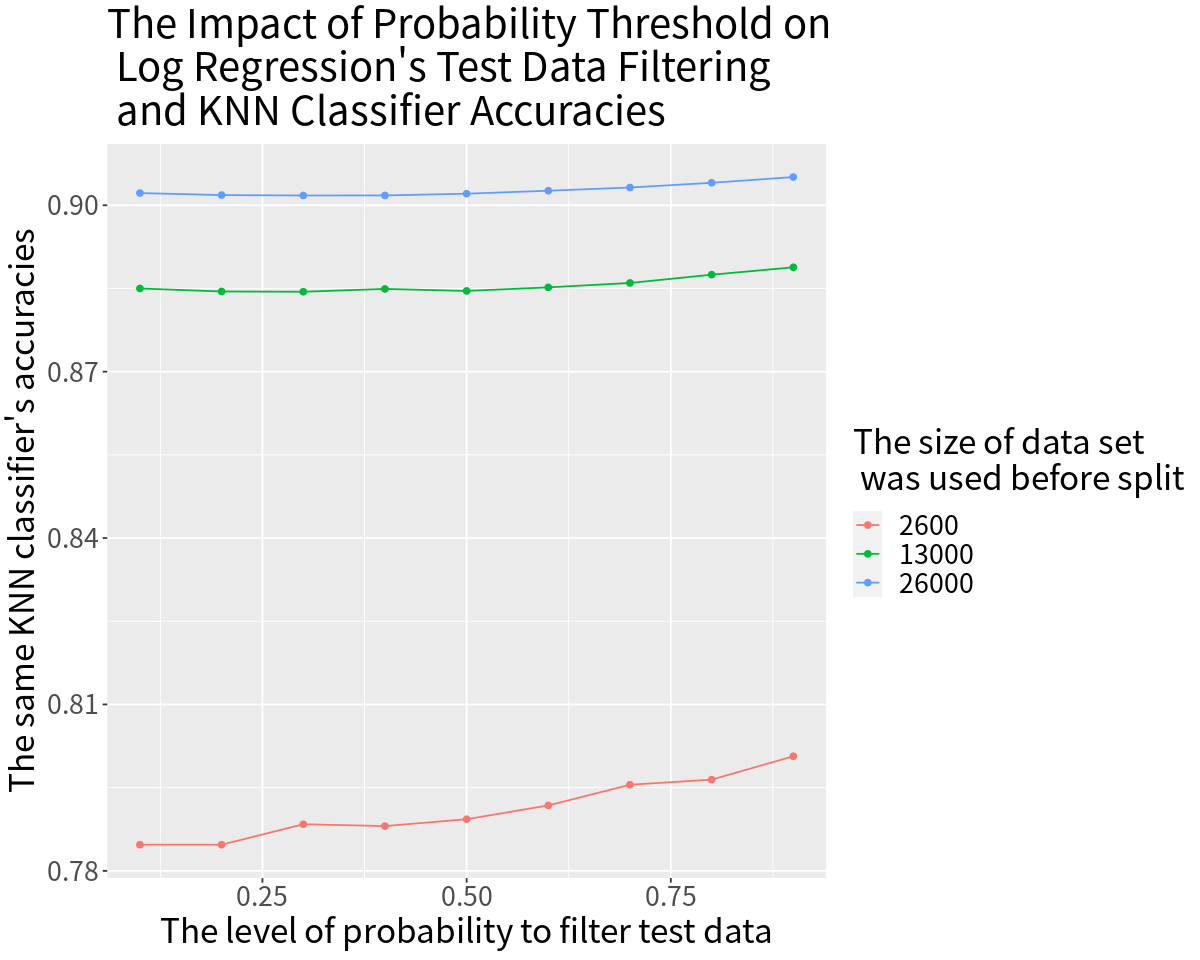

In [51]:
options(repr.plot.height = 8, repr.plot.width = 10)

all_result_lrm_plot_acy <- all_result_lrm |>
    ggplot(aes(x = prob, y = .estimate, color = data_size)) +
    geom_line() +
    geom_point() +
    labs(x = "The level of probability to filter test data",
         y = "The same KNN classifier's accuracies", 
         color = "The size of data set \n was used before split") +
    ggtitle("The Impact of Probability Threshold on \n Log Regression's Test Data Filtering \n and KNN Classifier Accuracies") +
    theme(text = element_text(size = 20))

all_result_lrm_plot_acy

<div align="center">Figure 7.4: Probability threshold against knn classifier accuracies for each size of data.

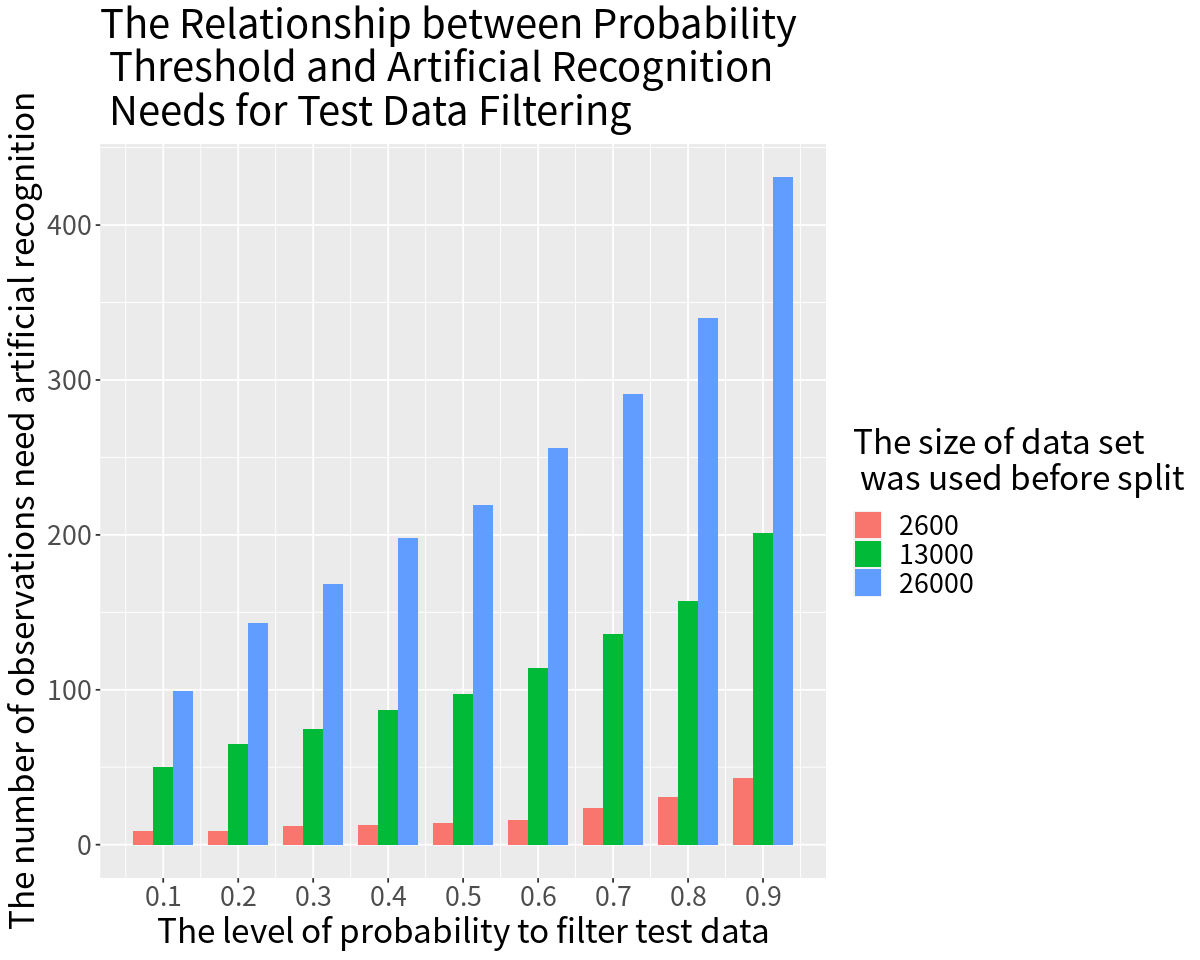

In [52]:
options(repr.plot.height = 8, repr.plot.width = 10)

all_result_lrm_plot_bar <- all_result_lrm |>
    mutate(test_data_size = as.double(test_data_size)) |>
    ggplot(aes(x = prob, y = art_reg, fill = data_size)) +
    geom_bar(stat = "identity", width = 0.08, position = "dodge") +
    labs(x = "The level of probability to filter test data",
         y = "The number of observations need artificial recognition", 
         fill = "The size of data set \n was used before split") +
    ggtitle("The Relationship between Probability \n Threshold and Artificial Recognition \n Needs for Test Data Filtering") +
    theme(text = element_text(size = 20)) +
    scale_x_continuous(breaks = seq(0, 1, by = 0.1))

all_result_lrm_plot_bar

<div align="center">Figure 7.5: Probability threshold against amount of handwriting needed to be manually recognized for each size of data.

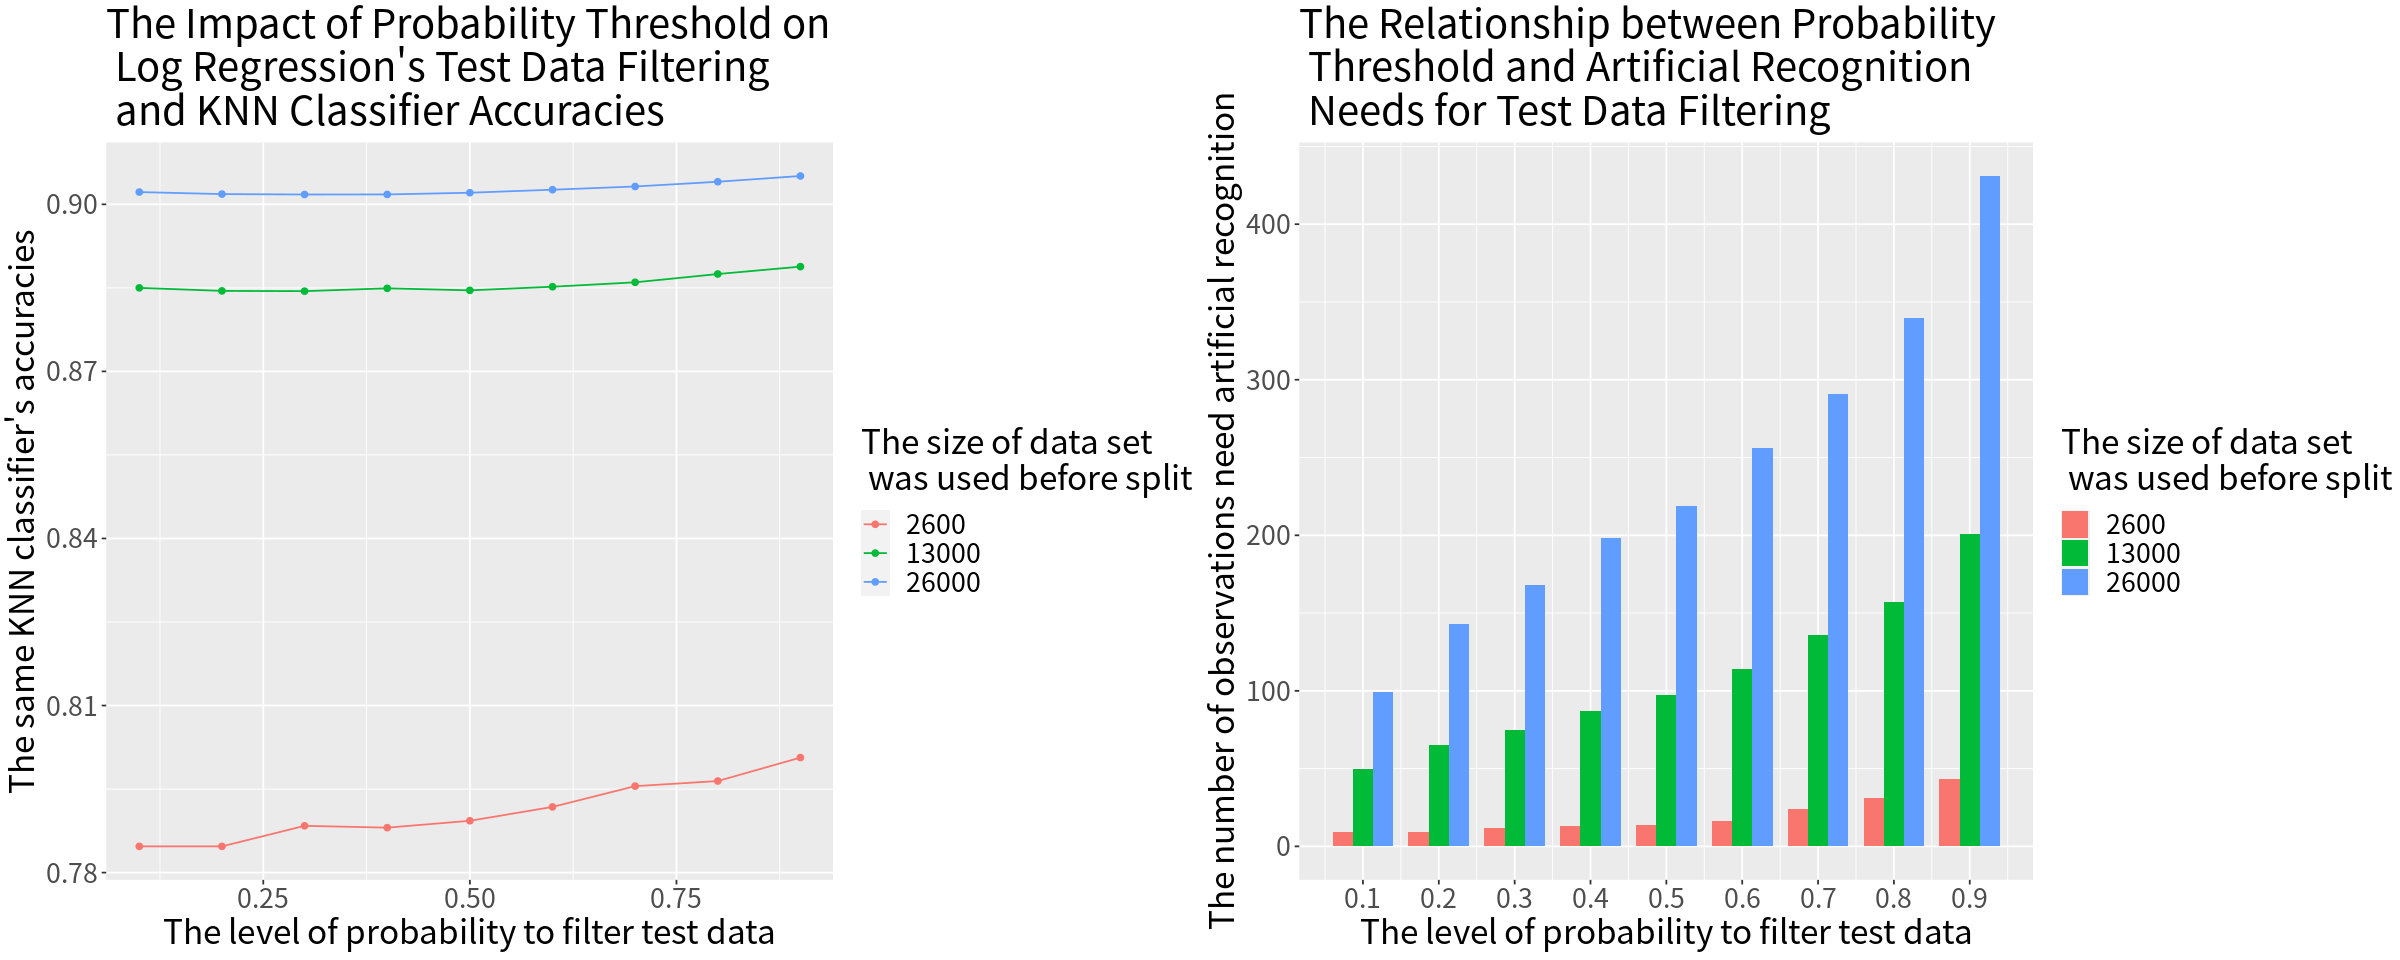

In [53]:
options(repr.plot.height = 8, repr.plot.width = 20)
plot_grid(all_result_lrm_plot_acy, all_result_lrm_plot_bar, ncol = 2)

<div align="center">Figure 7.6: Combination of Figrue 7.4 and Figure 7.5

- Calculate the average accuracy increasing rate every 10% for each data size.\
Ex: $\frac{(\text{accuracy with filter threshold of 20%} - \text{accuracy with filter threshold of 10%)}}{\text{accuracy with filter threshold of 10%}}$(This example shows the increasing rate for $10\%$ to $20\%$. We calculate the increasing rate for every intervals and excerpt the average.)
- Then figure out the average increasing rate for all three data size.

In [54]:
acy_growth_rate = all_result_lrm |>
  group_by(data_size) |>
  mutate(diff_acy = .estimate - lag(.estimate),
         "residual_%" = (diff_acy / lag(.estimate) * 100))|>
         summarize("mean_%" = mean(`residual_%`,na.rm = TRUE))

acy_growth_rate

overall_acy_growth_rate <- acy_growth_rate |>
    summarize(overall_acy_inc_rate = mean(`mean_%`))

overall_acy_growth_rate

data_size,mean_%
<fct>,<dbl>
2600,0.25202617
13000,0.05382804
26000,0.03997881


overall_acy_inc_rate
<dbl>
0.1152777


<div align="center">Figure 7.7: Upper: Average increasing rate of accuracies every 10% of filter threshold by data size.
<div align="center">Bottom: Overall average increasing rate of accuracies every 10% of filter threshold.

- Calculate the average "manually processing data volume"(to abbreviate as "manual data" in the following context.) increasing rate every 10% for each data size.\
Ex: $\frac{(\text{"manual data" with filter threshold of 20%} - \text{"manual data" with filter threshold of 10%)}}{\text{"manual data" with filter threshold of 10%}}$(This example shows the increasing rate for $10\%$ to $20\%$. We calculate the increasing rate for every intervals and excerpt the average.)
- Then figure out the average increasing rate for all three data size.

In [55]:
manual_growth_rate <- all_result_lrm |>
  group_by(data_size) |>
  mutate(amount_manual = case_when(
    data_size == 2600 ~ 650 - test_data_size,
    data_size == 13000 ~ 3250 - test_data_size,
    data_size == 26000 ~ 6500 - test_data_size,
    TRUE ~ NA_real_))|>
  mutate(manual_incre_rate = (amount_manual - lag(amount_manual))/lag(amount_manual))|>
  summarize(avg_manual_inc_rate = mean(manual_incre_rate, na.rm = TRUE))

manual_growth_rate

overall_manual_growth_rate <- manual_growth_rate|>
  summarize(overall_inc_rate = mean(avg_manual_inc_rate))

overall_manual_growth_rate

data_size,avg_manual_inc_rate
<fct>,<dbl>
2600,0.2269013
13000,0.1914619
26000,0.2057003


overall_inc_rate
<dbl>
0.2080212


<div align="center">Figure 7.8: Upper: Average increasing rate of manually processing data volume every 10% of filter threshold by data size.
<div align="center">Bottom: Overall average increasing rate of Manually processing data volume every 10% of filter threshold.

In [56]:
solely_knnacy_26000 <- all_result|>
                    filter(data_size ==26000)|>
                    pull(.estimate)
solely_knnacy_13000 <- all_result|>
                    filter(data_size == 13000)|>
                    pull(.estimate)
solely_knnacy_2600<-all_result|>
                    filter(data_size == 2600)|>
                    pull(.estimate)
`90%acy_26000`<-all_result_lrm|>
                filter(data_size == 26000,prob == 0.9)|>
                pull(.estimate)
`90%acy_13000`<-all_result_lrm|>
                filter(data_size ==13000,prob == 0.9)|>
                pull(.estimate)

`90%acy_2600`<-all_result_lrm|>
                filter(data_size == 2600,prob== 0.9)|>
                pull(.estimate)

tibble(data_size = c(2600,13000,26000),
       diff=c(`90%acy_2600` - solely_knnacy_2600,
       `90%acy_13000` - solely_knnacy_13000,
       `90%acy_26000` - solely_knnacy_26000))

data_size,diff
<dbl>,<dbl>
2600,0.012966671
13000,0.002969851
26000,0.001706833


<div align="center">Figure 7.9: Difference between solely KNN accuracies and accuracies with filtering less than 90% probability data.

<span style="font-size: 22px;">**Discussion**</span>

$\qquad$**Drawing from the result above, it can be concluded that in handwriting classification, the larger the training data set is, the higher the accuracy will be.** From Figure 7.1, as the data size goes larger (from $2600$ to $26000$), the accuracy also goes higher (from $80.00%$ to $90.65%$). To be more intuitive, the plot (Figure 7.2) gives a better visualization and provides an easy understanding trend. This conclusion is also supported by a previously conducted research on investigating the relationship between sample size and classification accuracy(Chu et al., 2012). Approximately, the accuracy increased by $4.5%$ every $10,000$ observations when adding rows from $2600$ to $26000$. This boost might change if the training set goes larger. \
$\qquad$**Besides the size of the training data set, filtering ambiguous handwriting data can also slightly improve the accuracy.** By giving an eye on each colored line on the line plot (Figure 7.4), it shows a general trend that as the filter threshold goes higher, the accuracies are slightly improved. Take the $26000$ data set as an example, Figure 7.9 shows that even if the filter threshold is up to $90%$ (which means we only take the data that has logistic regression probability greater than $0.9$), the accuracy is increased only by $0.28%$. The tiny improvement might be caused by the majority of observations in the test data set having logistic regression probabilities greater than $0.9$ (Figure 6.7.1). So though we discarded the observations with lower than $90%$ probabilities, these small sets of ambiguous data do not matter much on the total accuracy. Comparing with the benefit of raising the accuracy brought by expanding the training data set(increased $10.64%$ by expanding from $2600$ to $26000$ observations), the profit brought by discarding unclear handwriting is much lower($0.28%$ by filtering the data with less than $90%$ probabilities). \
$\qquad$**Moreover, the accuracy improvement is more remarkable when the data set is smaller($2600$ observations) than the bigger one($26000$ observations).** When the size is $13000$ observations, accuracy is increased by $0.55%$ by filtering less-than-90%-probabilities images compared to solely KNN models(Figure 7.9). While it comes to 2600 observations, the difference is approximately $1.1%$(Figure 7.9). As the plot shown (Figure 7.4), the larger the data size is, the less increase the accuracy will be.\
$\qquad$As discussed above, the improvement on accuracy is very small when we filter the unclear data. However, using the 26000 data set as an example, when this model is put into actual production, the benefits brought by $0.28%$ are quite significant. When considering an example that a postal service with one million handwritten letters need to be processed, a mere $0.28%$ improvement would ensure that at most $280$ letters addresses are correctly interpreted, subsequently guaranteeing the accurate delivery of $280$ letters to their intended destinations. Nonetheless, besides considering improving machine recognition accuracies, the increased manual workload due to filtering unclear data and handing them to the workers also need to be counted as a factor. Presented in Figure 7.5, **as the filter threshold increases, the amount of data needed to be dealt manually also increases.** On average, as the threshold increases by $10%$, the amount of manually recognized handwriting is increased by $26.89%$(Figure 7.8), while the accuracy increasing rate is $0.11%$(Figure 7.7), which is very little.

$\qquad$This study has yielded the most accurate data within the scope of the researchers’ capabilities. However, there are still areas that require improvement. Firstly, when applying KNN models for $13000$ and $26000$ observations data sets, this research does not run the cross validation and find the best $k$ due to excessive computational requirements. So the accuracies for these two data sets still have space to improve. Secondly,  due to the platform limitations, larger data sets are not available for this study. Further research could gradually increase the amount of observations in a data set and calculate the best-k accuracy through KNN model. This could enable a coherent curve with data size on x-axis and accuracy on y-axis and figure out at what point the accuracy can reach an ideal level.

$\qquad$In summary, this study states that both expanding data size and filtering unclear data can increase the accuracy of handwriting recognition. But the improvement brought by increasing the unclear data threshold is tiny compared to the benefit brought by enlarging the data size. Nevertheless, a small increase of accuracy, even if it is only $0.1%$, will enable a big productive improvement in industry. However, further research is still needed to balance the cost of human resources and machine accuracy. 

$\qquad$Handwriting recognition is a vast and complex field of study. This research, however, only dived into a small portion of it, specifically focused on recognizing English alphabets. More complex aspects of handwriting recognition, such as recognizing different handwriting styles, identifying the number of letters in handwritten words, recognizing non-alphabetic characters (such as Japanese or Chinese, which encompass thousands of character categories), excluding interference from stains or smudges, still require further research for improvement.




<div align="center"><span style="font-size: 22px; font-weight: bold; text-align: center;"> References</span>

Chu, C., Hsu, A., Chou, K., Bandettini, P., Lin, C., for the Alzheimer's Disease Neuroimaging Initiative, & Alzheimer's Disease Neuroimaging Initiative. (2012). Does feature selection improve 

$\qquad$ classification accuracy? impact of sample size and feature selection on classification using anatomical magnetic resonance images. NeuroImage (Orlando, Fla.), 60(1), 59-70.

$\qquad$ https://doi.org/10.1016/j.neuroimage.2011.11.066 




Dhande, P. S., & Kharat, R. (2017). Character recognition for cursive english handwriting to recognize medicine name from doctor's prescription. Paper presented at the 1-5. 

$\qquad$ https://doi.org/10.1109/ICCUBEA.2017.8463842
